# Importações de bibliotecas

In [ ]:
import pandas as pd
import numpy as np
from google.colab import drive
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns

# Ligar ao google drive

In [ ]:
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
# Caminho para o seu arquivo original no Google Drive
file_path_custo = '/content/drive/MyDrive/ProjetodeCiênciadeDados/dt_custos_procedimentos.csv'

In [ ]:
# Caminho para o seu arquivo original no Google Drive
file_path_proc = '/content/drive/MyDrive/ProjetodeCiênciadeDados/dt_procedimentons.csv'

# Verificação da Qualidade dos Dados

In [ ]:
df_custo = pd.read_csv(file_path_custo)
df_proc = pd.read_csv(file_path_proc)

In [ ]:
print("Numero de linhas em df_proc:")
display(len(df_proc))

Numero de linhas em df_proc:


322837

## Completude: Os dados estão completos? Existem lacunas (dados ausentes)?

In [ ]:
# Load the dataframes
try:

    print("Valores nulos em df_proc:")
    null_proc = df_proc.isnull().sum()
    display(null_proc[null_proc > 0])

except FileNotFoundError:
    print("One or both files were not found. Please check the file paths.")
except Exception as e:
    print(f"An error occurred: {e}")

Valores nulos em df_proc:


,0
Médico Executor,1
Médico Solic.,80


Verificamos que temos um registro de Médico Executor nulo, e 80 registros de Médico Solic. nulos.

Pensei em 3 opcoes:
- Por ser poucos registros, excluir os mesmos
- Definir Médico Solic.	= Médico Executor e Médico Executor  = Médico Solic.
- Verificar qual o medico solicitante que mais aparece para o medico executor, e vice versa, para preencher baseado nisso.

Por se tratar de apenas 81 registros, decidi excluir os mesmos, seria muito trabalho para salvar pouca coisa.

In [ ]:
df_proc.dropna(subset=['Médico Solic.', 'Médico Executor'], inplace=True)

# Verify the changes
print("Null values in df_proc after removing rows with nulls in 'Médico Solic.' and 'Médico Executor':")
display(df_proc.isnull().sum())

Null values in df_proc after removing rows with nulls in 'Médico Solic.' and 'Médico Executor':


,0
Data,0
Paciente,0
Procedimento,0
Situação,0
Exec,0
Canc,0
Convênio,0
Modalidade,0
Médico Executor,0
Qtd,0


## Unicidade: Evitam duplicatas? Cada item de dado é único?

In [ ]:
df_custo.duplicated().sum()

np.int64(0)

In [ ]:
df_proc.duplicated().sum()

np.int64(1516)

### Visualizando linhas duplicadas

In [ ]:
duplicated_rows = df_proc[df_proc.duplicated()]
if not duplicated_rows.empty:
    print("Examples of duplicated rows in df_proc:")
    display(duplicated_rows.head(5))
else:
    print("No duplicated rows found in df_proc.")

Examples of duplicated rows in df_proc:


,Data,Paciente,Procedimento,Situação,Exec,Canc,Convênio,Modalidade,Médico Executor,Qtd,Valor Cobrado,Desconto,Valor Pago,Valor Líquido 2,Procedência,Médico Solic.,Tipo,Comando,Sexo Paciente
56818,08/11/2019,Paciente_20662,BIÓPSIA PERCUTÂNEA POR ULTRASSONOGRAFIA,FATURADO,s,n,AMÉRICA PLANOS DE SAUDE,ULTRASSOM,Medico_0003,1.0,210.00,0.0,0.0,210.00,Paciente,Medico_0181,Realizado,USG SALA 04,Feminino
56819,08/11/2019,Paciente_20662,BIÓPSIA PERCUTÂNEA POR ULTRASSONOGRAFIA,FATURADO,s,n,AMÉRICA PLANOS DE SAUDE,ULTRASSOM,Medico_0003,1.0,210.00,0.0,0.0,210.00,Paciente,Medico_0181,Realizado,USG SALA 04,Feminino
56977,02/01/2019,Paciente_20707,CORE BIÓPSIA POR ULTRASSONOGRAFIA,FINALIZADO,s,n,PARTICULAR,ULTRASSOM,Medico_0004,1.0,600.00,0.0,600.0,600.00,Interno,Medico_0183,Realizado,USG SALA 02,Feminino
57420,04/01/2019,Paciente_20628,ESTEREOTAXIA POR ULTRASSONOGRAFIA,FATURADO,s,n,UNIMED,ULTRASSOM,Medico_0004,1.0,139.93,0.0,0.0,139.93,Interno,Medico_0150,Realizado,USG SALA 02,Feminino
57466,04/01/2019,Paciente_20850,BIÓPSIA PERCUTÂNEA POR ULTRASSONOGRAFIA,FATURADO,s,n,HAPVIDA,ULTRASSOM,Medico_0005,1.0,210.00,0.0,0.0,210.00,Interno,Medico_0074,Realizado,USG SALA 03,Feminino


Segundo o especialista da área, procedimentos que se repetem na mesma data e para o mesmo paciente poderiam ser considerados complementares. No entanto, foi observado que, quando isso ocorre, o campo "Convênio" é preenchido com o valor "complementares". Portanto, seguiremos com a exclusão dos itens que não atendem a essa regra, tratando-os como duplicados.

In [ ]:
# Remove duplicate rows from df_proc
df_proc.drop_duplicates(inplace=True)

# Verify that duplicates have been removed
print("Number of duplicate rows after removal:")
display(df_proc.duplicated().sum())

Number of duplicate rows after removal:


np.int64(0)

## Validação: Os dados estão em um formato apropriado e válido para uso?

In [ ]:
df_custo.dtypes

,0
Mês/Ano,int64
Mamografia,object
Tomografia,object
Ultrassom,object
Densitometria,object
Raio-X,object
Ressonância Magnética,object
Mamotomia,object


In [ ]:
df_proc.dtypes

,0
Data,object
Paciente,object
Procedimento,object
Situação,object
Exec,object
Canc,object
Convênio,object
Modalidade,object
Médico Executor,object
Qtd,float64


### Ajustar Mês/Ano para datetime, e o restante para float

In [ ]:
# Convert object columns to float in df_custo
for col in df_custo.select_dtypes(include='object').columns:
    df_custo[col] = df_custo[col].str.replace(',', '.', regex=False) # Replace comma with dot for decimal separation
    df_custo[col] = pd.to_numeric(df_custo[col], errors='coerce') # Convert to numeric, coercing errors to NaN

# Verify the changes
print("Data types after conversion:")
display(df_custo.dtypes)

Data types after conversion:


,0
Mês/Ano,int64
Mamografia,float64
Tomografia,float64
Ultrassom,float64
Densitometria,float64
Raio-X,float64
Ressonância Magnética,float64
Mamotomia,float64


In [ ]:
# Convert 'Mês/Ano' column to datetime
df_custo['Mês/Ano'] = pd.to_datetime(df_custo['Mês/Ano'], format='%Y%m%d', errors='coerce') # Assuming the integer format is YYYYMMDD

# Verify the changes
print("Data type of 'Mês/Ano' after conversion:")
display(df_custo['Mês/Ano'].dtype)

print("Data types after conversion:")
display(df_custo.dtypes)

Data type of 'Mês/Ano' after conversion:


dtype('<M8[ns]')

Data types after conversion:


,0
Mês/Ano,datetime64[ns]
Mamografia,float64
Tomografia,float64
Ultrassom,float64
Densitometria,float64
Raio-X,float64
Ressonância Magnética,float64
Mamotomia,float64


### Ajustar Data para datetime

In [ ]:
# Convert 'Data' column to datetime in df_proc
df_proc['Data'] = pd.to_datetime(df_proc['Data'], format='%d/%m/%Y', errors='coerce')

# Verify the changes
print("Data type of 'Data' after conversion:")
display(df_proc['Data'].dtype)

print("\nFirst 5 rows of 'Data' after conversion:")
display(df_proc['Data'].head())

Data type of 'Data' after conversion:


dtype('<M8[ns]')


First 5 rows of 'Data' after conversion:


,Data
0,2017-10-19
1,2017-12-12
2,2017-10-20
3,2017-12-12
4,2017-10-20


#### Tipos ajustados

In [ ]:
df_custo.dtypes

,0
Mês/Ano,datetime64[ns]
Mamografia,float64
Tomografia,float64
Ultrassom,float64
Densitometria,float64
Raio-X,float64
Ressonância Magnética,float64
Mamotomia,float64


In [ ]:
df_proc.dtypes

,0
Data,datetime64[ns]
Paciente,object
Procedimento,object
Situação,object
Exec,object
Canc,object
Convênio,object
Modalidade,object
Médico Executor,object
Qtd,float64


### Verificar a consistência do formato

In [ ]:
for column in df_proc.select_dtypes(include='object').columns:
    print(f"Value counts for column: {column}")
    display(df_proc[column].value_counts())

Value counts for column: Paciente


,count
Paciente,
Paciente_2039,70
Paciente_2261,65
Paciente_8171,63
Paciente_17865,57
Paciente_0003,57
...,...
Paciente_69914,1
Paciente_69913,1
Paciente_69912,1


Value counts for column: Procedimento


,count
Procedimento,
ULTRASSONOGRAFIA MAMÁRIA,65240
ULTRASSONOGRAFIA TRANSVAGINAL,42827
MAMOGRAFIA DIGITAL,31990
MAMOGRAFIA,18884
DENSITOMETRIA ÓSSEA,16265
...,...
ULTRASSONOGRAFIA ARTERIAS TEMPORAIS,1
DOPPLER DE AXILAS,1
ULTRASSONOGRAFIA POPLÍTEO DIREITO,1


Value counts for column: Situação


,count
Situação,
FATURADO,266949
FINALIZADO,53854
ENCAMINHADO,301
ATENDIDO RECEPÇÃO,42
EXECUTADO,34
LANÇAR MATERIAL,22
CONFIRMADO,15
A CONFIRMAR,13
ATENDIMENTO RECEPÇÃO,4


Value counts for column: Exec


,count
Exec,
s,321240


Value counts for column: Canc


,count
Canc,
n,321240


Value counts for column: Convênio


,count
Convênio,
UNIMED,167786
IPASGO,70354
PARTICULAR,15924
COLUNA EM MOVIMENTO,14239
IMAS,8243
CASSI,8023
GEAP,7211
HAPVIDA,5698
SAUDE CAIXA,4494


Value counts for column: Modalidade


,count
Modalidade,
ULTRASSOM,194758
MAMOGRAFIA,53280
RAIO-X,30624
DENSITOMETRIA,17297
TOMOGRAFIA,13098
RESSONÂNCIA MAGNÉTICA,11991
MAMOTOMIA,192


Value counts for column: Médico Executor


,count
Médico Executor,
Medico_0003,58033
Medico_0005,44518
Medico_0002,36898
Medico_0004,35307
Medico_0006,19304
Medico_0014,18018
Medico_0013,13048
Medico_0018,13023
Medico_0009,11710


Value counts for column: Procedência


,count
Procedência,
Paciente,136538
Interno,106110
Indicado pelo Médico,47683
Indicado por amigo ou familiar,15897
Indicado pelo convênio,12172
Buscou na internet,2840


Value counts for column: Médico Solic.


,count
Médico Solic.,
Medico_0050,9309
Medico_0054,8674
Medico_0085,4800
Medico_0757,4668
Medico_0073,4595
...,...
Medico_8513,1
Medico_8512,1
Medico_8511,1


Value counts for column: Tipo


,count
Tipo,
Realizado,321240


Value counts for column: Comando


,count
Comando,
USG SALA 01,120036
MAMOGRAFIA,53280
USG SALA 05,34665
RAIO-X,30102
USG SALA 02,19401
DENSITOMETRIA,17297
RESSONÂNCIA MAGNÉTICA,11991
USG SALA 03,11621
TOMO/RX,10051


Value counts for column: Sexo Paciente


,count
Sexo Paciente,
Feminino,286095
Masculino,33239
Não definido,1906


Para um melhor entendimento dos dados, decidi converter os textos para lower case.

In [ ]:
for col in df_proc.select_dtypes(include='object').columns:
    df_proc[col] = df_proc[col].str.lower()

for col in df_custo.select_dtypes(include='object').columns:
    df_custo[col] = df_custo[col].str.lower()

In [ ]:
for column in df_proc.select_dtypes(include='object').columns:
    print(f"Value counts for column: {column}")
    display(df_proc[column].value_counts())

Value counts for column: Paciente


,count
Paciente,
paciente_2039,70
paciente_2261,65
paciente_8171,63
paciente_17865,57
paciente_0003,57
...,...
paciente_69914,1
paciente_69913,1
paciente_69912,1


Value counts for column: Procedimento


,count
Procedimento,
ultrassonografia mamária,65240
ultrassonografia transvaginal,42827
mamografia digital,31990
mamografia,18884
densitometria óssea,16265
...,...
usg obstetrica com doppler gemelar,1
usg obstetrica 3d gemelar,1
ultrassonografia poplíteo direito,1


Value counts for column: Situação


,count
Situação,
faturado,266949
finalizado,53854
encaminhado,301
atendido recepção,42
executado,34
lançar material,22
confirmado,15
a confirmar,13
atendimento recepção,4


Value counts for column: Exec


,count
Exec,
s,321240


Value counts for column: Canc


,count
Canc,
n,321240


Value counts for column: Convênio


,count
Convênio,
unimed,167786
ipasgo,70354
particular,15924
coluna em movimento,14239
imas,8243
cassi,8023
geap,7211
hapvida,5698
saude caixa,4494


Value counts for column: Modalidade


,count
Modalidade,
ultrassom,194758
mamografia,53280
raio-x,30624
densitometria,17297
tomografia,13098
ressonância magnética,11991
mamotomia,192


Value counts for column: Médico Executor


,count
Médico Executor,
medico_0003,58033
medico_0005,44518
medico_0002,36898
medico_0004,35307
medico_0006,19304
medico_0014,18018
medico_0013,13048
medico_0018,13023
medico_0009,11710


Value counts for column: Procedência


,count
Procedência,
paciente,136538
interno,106110
indicado pelo médico,47683
indicado por amigo ou familiar,15897
indicado pelo convênio,12172
buscou na internet,2840


Value counts for column: Médico Solic.


,count
Médico Solic.,
medico_0050,9309
medico_0054,8674
medico_0085,4800
medico_0757,4668
medico_0073,4595
...,...
medico_8513,1
medico_8512,1
medico_8511,1


Value counts for column: Tipo


,count
Tipo,
realizado,321240


Value counts for column: Comando


,count
Comando,
usg sala 01,120036
mamografia,53280
usg sala 05,34665
raio-x,30102
usg sala 02,19401
densitometria,17297
ressonância magnética,11991
usg sala 03,11621
tomo/rx,10051


Value counts for column: Sexo Paciente


,count
Sexo Paciente,
feminino,286095
masculino,33239
não definido,1906


## Consistência: Os dados são consistentes em diferentes sistemas ou plataformas?

### Verificando valores numéricos

In [ ]:
df_custo.describe().drop(columns=['Mês/Ano'], errors='ignore')

,Mamografia,Tomografia,Ultrassom,Densitometria,Raio-X,Ressonância Magnética,Mamotomia
count,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000
mean,94.453525,148.754016,42.209426,33.286148,29.241967,378.298820,1043.811557
min,94.055000,148.225000,41.930000,33.180000,22.820000,377.832000,1042.405000
25%,94.380000,148.715000,42.175000,33.250000,29.295000,378.252000,1043.705000
50%,94.445000,148.750000,42.210000,33.285000,29.340000,378.294000,1043.835000
75%,94.510000,148.820000,42.245000,33.320000,29.385000,378.336000,1043.965000
max,94.900000,149.135000,42.350000,33.355000,29.475000,378.630000,1045.070000
std,0.126972,0.113070,0.052497,0.035560,0.836994,0.099123,0.318662


In [ ]:
df_proc.describe().drop(columns=['Data'], errors='ignore')

,Qtd,Valor Cobrado,Desconto,Valor Pago,Valor Líquido 2
count,321240.0,321240.000000,321240.000000,321240.000000,321240.000000
mean,1.0,138.402167,2.076817,25.231329,136.325322
min,1.0,0.000000,0.000000,0.000000,-430.000000
25%,1.0,58.900000,0.000000,0.000000,58.900000
50%,1.0,75.860000,0.000000,0.000000,74.590000
75%,1.0,144.640000,0.000000,0.000000,144.640000
max,1.0,7459.950000,1160.000000,4975.380000,7459.950000
std,0.0,207.154318,18.861735,123.732677,205.050061


A maioria dos registros com valores negativos em Valor Líquido parecem ser erros de lançamento. Ex:

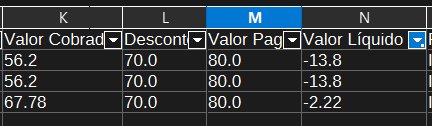

E sao poucos valores, dessa forma, vou excluir os registros com valores negativos.


In [ ]:
# Remove rows where 'Valor Líquido 2' is negative
df_proc = df_proc[df_proc['Valor Líquido 2'] >= 0]

# Verify the changes
print("Number of rows after removing negative 'Valor Líquido 2' values:")
display(len(df_proc))

Number of rows after removing negative 'Valor Líquido 2' values:


321045

In [ ]:
df_proc.describe().drop(columns=['Data'], errors='ignore')

,Qtd,Valor Cobrado,Desconto,Valor Pago,Valor Líquido 2
count,321045.0,321045.000000,321045.000000,321045.000000,321045.000000
mean,1.0,138.298866,1.848472,25.099961,136.450366
min,1.0,0.000000,0.000000,0.000000,0.000000
25%,1.0,58.900000,0.000000,0.000000,58.900000
50%,1.0,75.860000,0.000000,0.000000,74.590000
75%,1.0,144.640000,0.000000,0.000000,144.640000
max,1.0,7459.950000,800.000000,4975.380000,7459.950000
std,0.0,207.118181,15.254972,123.599185,205.042867


### Removendo linhas onde o valor cobrado é 0 e o campo Convênio não é cortesia ou complementar

In [ ]:
# Remove rows where 'Valor Cobrado' is 0 and 'Convênio' is not 'cortesia' or 'complemento'
df_proc = df_proc[~((df_proc['Valor Cobrado'] == 0) & (~df_proc['Convênio'].isin(['cortesia', 'complemento'])))]

# Verify the changes
print("Number of rows after removing specific 'Valor Cobrado' and 'Convênio' combinations:")
display(len(df_proc))

Number of rows after removing specific 'Valor Cobrado' and 'Convênio' combinations:


320441

fazer relatório dos drops

# EDA (Análise Exploratória)

## Análise Estatística Descritiva

### Média, Mediana e Moda

tirar data

In [ ]:
df_proc.describe().drop(columns=['Data'], errors='ignore')

,Qtd,Valor Cobrado,Desconto,Valor Pago,Valor Líquido 2
count,320441.0,320441.000000,320441.000000,320441.000000,320441.000000
mean,1.0,138.559545,1.851956,25.144931,136.707561
min,1.0,0.000000,0.000000,0.000000,0.000000
25%,1.0,58.900000,0.000000,0.000000,58.900000
50%,1.0,77.470000,0.000000,0.000000,75.000000
75%,1.0,144.640000,0.000000,0.000000,144.640000
max,1.0,7459.950000,800.000000,4975.380000,7459.950000
std,0.0,207.226156,15.269131,123.705891,205.150342


### Criação de variável de tipo de convênio

In [ ]:
mapa_tipo_convenio = {
    # particular
    "particular": "particular",

    # parceria / clínica
    "clinica dr saude facil": "parceria/clínica",
    "clinica saude total": "parceria/clínica",
    "coluna em movimento": "parceria/clínica",

    # especial / ajuste
    "complemento": "especial/ajuste",
    "cortesia": "especial/ajuste",
    "pac pag mat": "especial/ajuste",
    "pagamento adm cassi": "especial/ajuste",
    "pagamento adm geap": "especial/ajuste",

    # convênio de saúde
    "affego saude": "convênio de saúde",
    "amil": "convênio de saúde",
    "américa planos de saude": "convênio de saúde",
    "assefaz": "convênio de saúde",
    "caeme saude": "convênio de saúde",
    "caesan": "convênio de saúde",
    "capesesp": "convênio de saúde",
    "casembrapa": "convênio de saúde",
    "cassi": "convênio de saúde",
    "celgmed": "convênio de saúde",
    "geap": "convênio de saúde",
    "hapvida": "convênio de saúde",
    "imas": "convênio de saúde",
    "ipasgo": "convênio de saúde",
    "planmed": "convênio de saúde",
    "postal saude": "convênio de saúde",
    "samp": "convênio de saúde",
    "saneago": "convênio de saúde",
    "saude caixa": "convênio de saúde",
    "sul america": "convênio de saúde",
    "unimed": "convênio de saúde",
    "conab": "convênio de saúde",
    "fundação saúde itaú": "convênio de saúde",

    # apoio social / político
    "casa de apoio bruno peixoto": "apoio social/político",
    "casa de apoio ovg": "apoio social/político",
    "programa bem estar": "apoio social/político",
}

# Nova coluna de classificação
df_proc["Tipo Convênio"] = df_proc["Convênio"].map(mapa_tipo_convenio)


In [ ]:
nao_mapeados = sorted(df_proc.loc[df_proc["Tipo Convênio"].isna(), "Convênio"].unique())
print(f"Convênios não mapeados (verificar grafia/acentos): {len(nao_mapeados)}")
for c in nao_mapeados:
    print("-", c)

Convênios não mapeados (verificar grafia/acentos): 0


In [ ]:
print("Distribuição por TipoConvenio")
display(df_proc["Tipo Convênio"].value_counts(dropna=False))

print("Top convênios por volume (com categoria)")
display(
    df_proc.groupby(["Tipo Convênio","Convênio"]).size()
          .sort_values(ascending=False).head(15)
          .rename("qtd").reset_index()
)

Distribuição por TipoConvenio


,count
Tipo Convênio,
convênio de saúde,288101
particular,15701
parceria/clínica,14266
especial/ajuste,2319
apoio social/político,54


Top convênios por volume (com categoria)


,Tipo Convênio,Convênio,qtd
0,convênio de saúde,unimed,167602
1,convênio de saúde,ipasgo,70249
2,particular,particular,15701
3,parceria/clínica,coluna em movimento,14228
4,convênio de saúde,imas,8238
5,convênio de saúde,cassi,8023
6,convênio de saúde,geap,7205
7,convênio de saúde,hapvida,5688
8,convênio de saúde,saude caixa,4481
9,convênio de saúde,affego saude,3571


## Visualização de Dados

### Identificar Outliers e Padrões Suspeitos

#### Boxplots

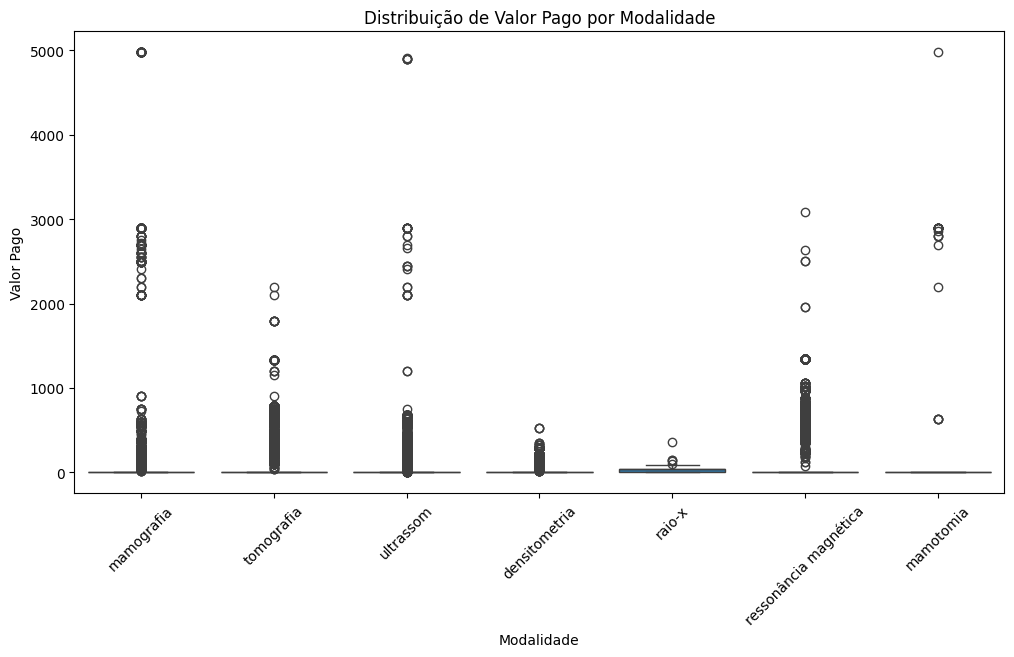

In [ ]:
plt.figure(figsize=(12,6))
sns.boxplot(data=df_proc, x="Modalidade", y="Valor Pago")
plt.xticks(rotation=45)
plt.title("Distribuição de Valor Pago por Modalidade")
plt.show()

In [ ]:
print("Describe - Valor Pago por Modalidade")
display(df_proc.groupby("Modalidade")["Valor Pago"].describe())

Describe - Valor Pago por Modalidade


,count,mean,std,min,25%,50%,75%,max
Modalidade,,,,,,,,
densitometria,17289.0,16.867826,55.128930,0.0,0.0,0.0,0.0,521.22
mamografia,53081.0,30.977399,206.971566,0.0,0.0,0.0,0.0,4975.38
mamotomia,192.0,319.551875,914.936306,0.0,0.0,0.0,0.0,4975.38
raio-x,30485.0,22.642024,22.018532,0.0,0.0,35.0,40.0,355.52
ressonância magnética,11934.0,106.175315,267.803735,0.0,0.0,0.0,0.0,3082.50
tomografia,13027.0,68.744343,184.337150,0.0,0.0,0.0,0.0,2200.00
ultrassom,194433.0,16.495671,70.515331,0.0,0.0,0.0,0.0,4911.66


Isso é um achado importante da sua EDA: você pode registrar no relatório que “para a maioria das modalidades, mais de 75% dos registros possuem Valor Pago = 0, indicando forte dependência de convênios que cobrem integralmente os custos, ou inconsistências de preenchimento. Isso deve ser tratado na preparação dos dados (exclusão, imputação ou reclassificação por convênio)”.

##### Levando em consideração valor líquido ao invés de valor pago pelo paciente

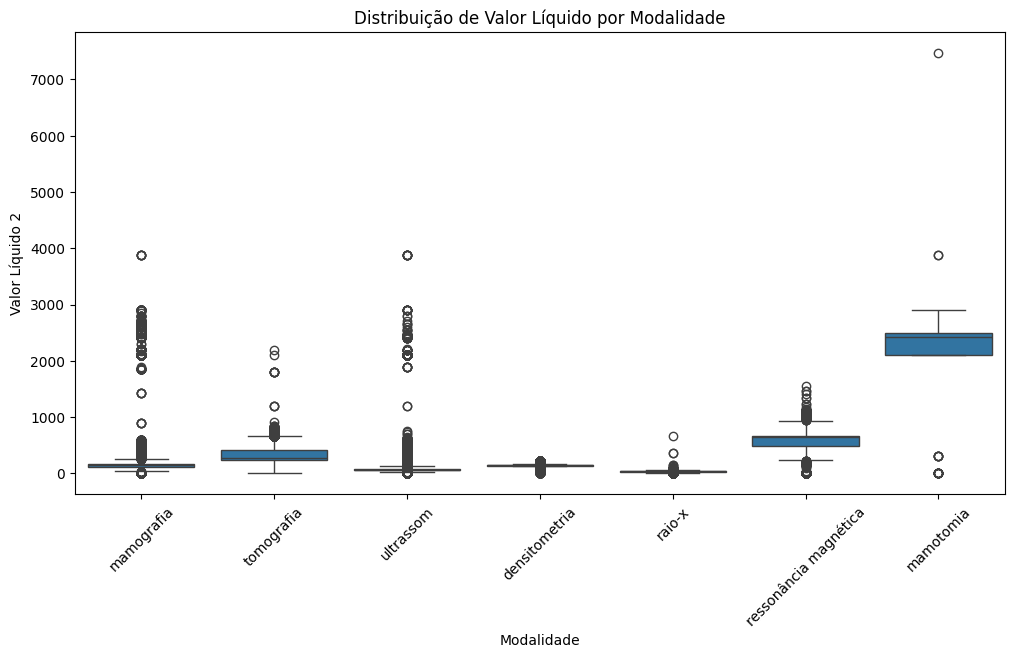

In [ ]:
plt.figure(figsize=(12,6))
sns.boxplot(data=df_proc, x="Modalidade", y="Valor Líquido 2")
plt.xticks(rotation=45)
plt.title("Distribuição de Valor Líquido por Modalidade")
plt.show()

In [ ]:
print("Describe - Valor Líquido 2 por Modalidade")
display(df_proc.groupby("Modalidade")["Valor Líquido 2"].describe())

Describe - Valor Líquido 2 por Modalidade


,count,mean,std,min,25%,50%,75%,max
Modalidade,,,,,,,,
densitometria,17289.0,142.817351,24.171444,0.0,137.19,144.64,146.990,225.40
mamografia,53081.0,182.972298,318.279416,0.0,110.20,143.11,166.630,3887.79
mamotomia,192.0,2179.183646,871.283290,0.0,2101.71,2418.00,2487.690,7459.95
raio-x,30485.0,34.977650,12.135415,0.0,28.74,35.00,40.000,670.18
ressonância magnética,11934.0,600.924079,190.243520,0.0,494.43,649.76,670.180,1552.12
tomografia,13027.0,340.524014,155.458736,0.0,238.30,281.53,409.745,2200.00
ultrassom,194433.0,95.318463,113.985273,0.0,58.90,67.58,85.850,3887.80


###### Olhando somente para convênios e particulares que são os que mais se repetem


=== Análise para Convênios de Saúde ===


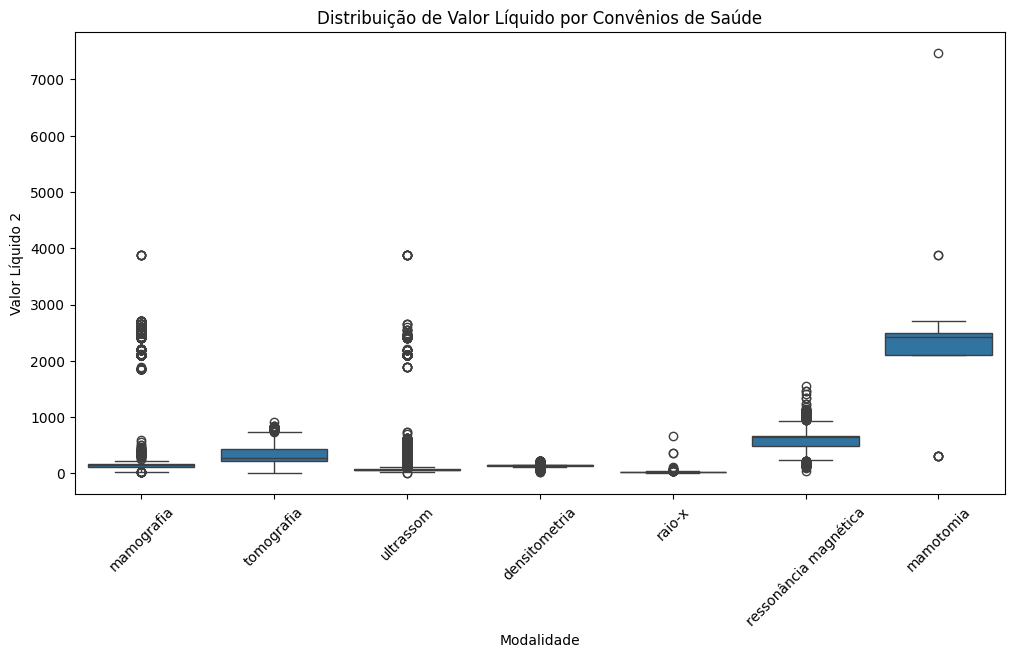

In [ ]:
df_proc_conv = df_proc[df_proc["Tipo Convênio"] == "convênio de saúde"]

print(f"\n=== Análise para Convênios de Saúde ===")

# Boxplot
plt.figure(figsize=(12,6))
sns.boxplot(data=df_proc_conv, x="Modalidade", y="Valor Líquido 2")
plt.xticks(rotation=45)
plt.title(f"Distribuição de Valor Líquido por Convênios de Saúde")
plt.show()

In [ ]:
# Describe
print(f"Describe - Valor Líquido 2 por Convênios de Saúde")
display(df_proc_conv.groupby("Modalidade")["Valor Líquido 2"].describe())

Describe - Valor Líquido 2 por Convênios de Saúde


,count,mean,std,min,25%,50%,75%,max
Modalidade,,,,,,,,
densitometria,16600.0,141.929389,20.022818,35.29,137.19,144.64,146.99,225.40
mamografia,49482.0,178.252145,300.705539,18.21,110.20,143.11,165.66,3887.79
mamotomia,158.0,2321.168924,603.516473,315.63,2101.71,2418.00,2487.69,7459.95
raio-x,14363.0,27.588330,9.361183,11.96,20.45,28.74,31.82,670.18
ressonância magnética,10625.0,606.064078,182.847449,42.72,494.43,649.76,670.18,1552.12
tomografia,11786.0,337.933783,148.405018,0.84,228.90,275.43,433.77,920.00
ultrassom,185087.0,90.350745,109.041261,8.55,58.90,67.36,83.70,3887.80



=== Análise para Particular ===


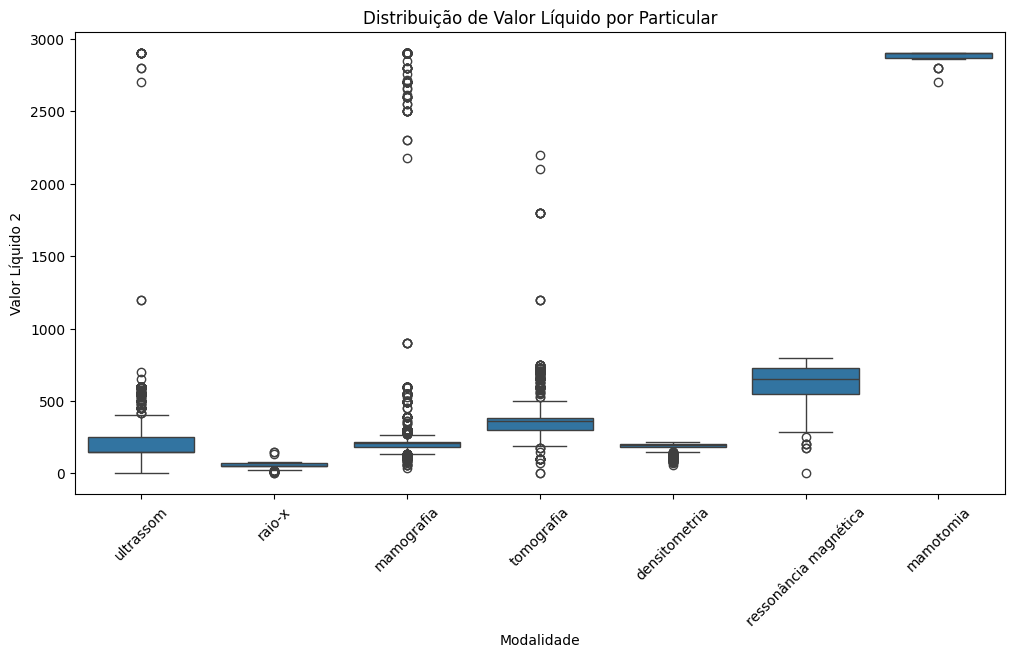

In [ ]:
df_proc_part = df_proc[df_proc["Tipo Convênio"] == "particular"]

print(f"\n=== Análise para Particular ===")

# Boxplot
plt.figure(figsize=(12,6))
sns.boxplot(data=df_proc_part, x="Modalidade", y="Valor Líquido 2")
plt.xticks(rotation=45)
plt.title(f"Distribuição de Valor Líquido por Particular")
plt.show()

In [ ]:
# Describe
print(f"Describe - Valor Líquido 2 por Particular")
display(df_proc_part.groupby("Modalidade")["Valor Líquido 2"].describe())

Describe - Valor Líquido 2 por Particular


,count,mean,std,min,25%,50%,75%,max
Modalidade,,,,,,,,
densitometria,606.0,186.041799,33.572789,58.54,180.0000,198.020,202.39,220.00
mamografia,2550.0,346.374380,555.029994,35.00,185.5525,210.000,220.00,2900.00
mamotomia,18.0,2869.920556,57.101834,2700.00,2868.9275,2900.000,2900.00,2900.00
raio-x,1530.0,54.569693,17.066647,0.00,50.0000,50.000,69.57,150.06
ressonância magnética,1140.0,637.177930,124.734434,0.00,550.0000,650.000,731.35,800.00
tomografia,1152.0,393.132604,190.494246,0.00,300.0000,359.655,380.00,2200.00
ultrassom,8705.0,207.020774,153.641590,0.00,145.8300,150.000,250.00,2900.00


Comparando convênios e particulares, nota-se que nos exames de baixo custo (raio-X, ultrassom, mamografia) os particulares pagam de 2 a 3 vezes mais que os convênios. Já nos exames de maior complexidade (ressonância, mamotomia, tomografia) a diferença é menor, com convênios pagando valores próximos aos particulares. Isso indica que os convênios garantem volume, mas os particulares representam maior rentabilidade, sobretudo nos exames mais simples e frequentes.

#### Gráficos de Dispersão

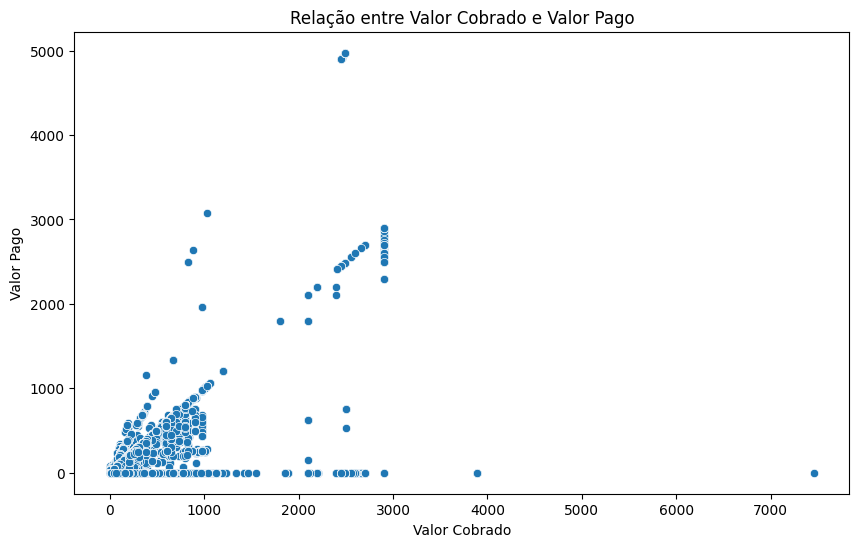

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_proc, x='Valor Cobrado', y='Valor Pago')
plt.title('Relação entre Valor Cobrado e Valor Pago')
plt.xlabel('Valor Cobrado')
plt.ylabel('Valor Pago')
plt.show()

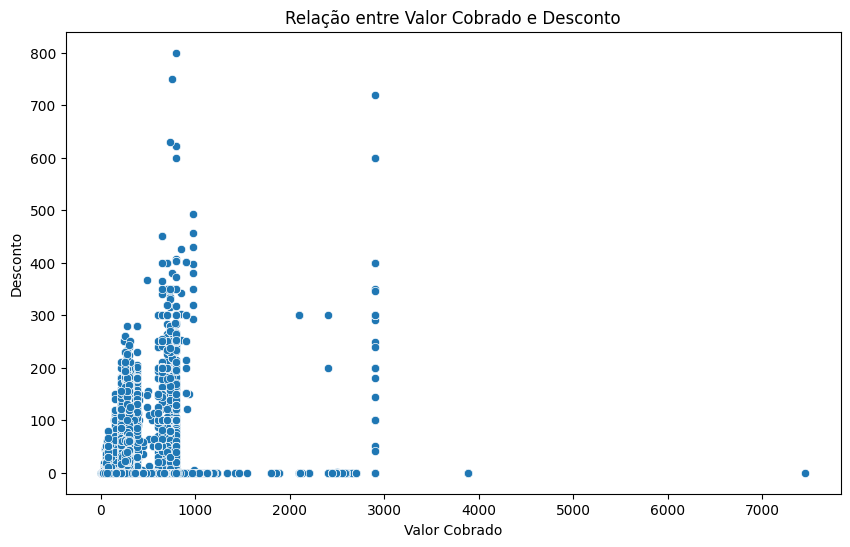

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_proc, x='Valor Cobrado', y='Desconto')
plt.title('Relação entre Valor Cobrado e Desconto')
plt.xlabel('Valor Cobrado')
plt.ylabel('Desconto')
plt.show()

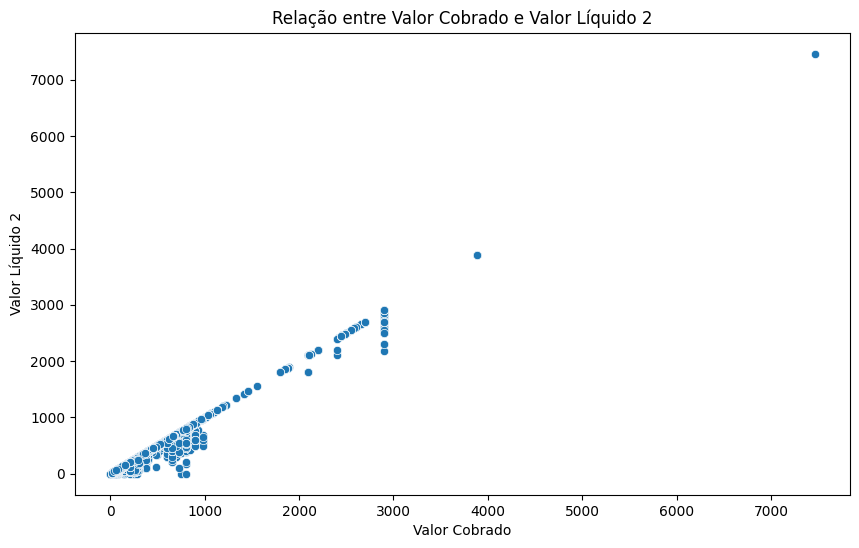

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_proc, x='Valor Cobrado', y='Valor Líquido 2')
plt.title('Relação entre Valor Cobrado e Valor Líquido 2')
plt.xlabel('Valor Cobrado')
plt.ylabel('Valor Líquido 2')
plt.show()

In [ ]:
# Check for cases where Valor Pago > Valor Cobrado
valor_pago_greater_than_cobrado = df_proc[df_proc['Valor Pago'] > df_proc['Valor Cobrado']]
print(f"Número de casos onde Valor Pago > Valor Cobrado: {len(valor_pago_greater_than_cobrado)}")

# Check for invalid discounts (Desconto < 0 or Desconto > Valor Cobrado)
invalid_discount = df_proc[(df_proc['Desconto'] < 0) | (df_proc['Desconto'] > df_proc['Valor Cobrado'])]
print(f"\nNúmero de casos onde o Desconto é inválido (Desconto < 0 ou Desconto > Valor Cobrado): {len(invalid_discount)}")

# Check for incorrect arithmetic (Valor Cobrado - Desconto != Valor Líquido 2)
# Allow for a small tolerance due to potential floating-point inaccuracies
tolerance = 1e-6
incorrect_arithmetic = df_proc[abs((df_proc['Valor Cobrado'] - df_proc['Desconto']) - df_proc['Valor Líquido 2']) > tolerance]
print(f"\nNúmero de casos onde a aritmética está incorreta (Valor Cobrado - Desconto != Valor Líquido 2) com uma tolerância de {tolerance}: {len(incorrect_arithmetic)}")

Número de casos onde Valor Pago > Valor Cobrado: 4015

Número de casos onde o Desconto é inválido (Desconto < 0 ou Desconto > Valor Cobrado): 0

Número de casos onde a aritmética está incorreta (Valor Cobrado - Desconto != Valor Líquido 2) com uma tolerância de 1e-06: 890


**Tratamento de Inconsistências nos Dados**

Após a análise exploratória, foram identificadas duas inconsistências principais que necessitam de correção para garantir a integridade e a qualidade do dataset. O plano de ação para cada uma é detalhado abaixo:

**1. Inconsistência: Valor Pago Superior ao Valor Cobrado**
* **Observação:** Foram encontrados **4.015 registros** onde a coluna `Valor Pago` apresenta um valor maior que a coluna `Valor Cobrado`.
* **Hipótese:** Esta ocorrência é interpretada como um erro de lançamento ou registro, pois, pela regra de negócio, o pagamento não deve exceder a cobrança.
* **Ação Corretiva:** Para estes registros, o `Valor Pago` será ajustado para ser igual ao `Valor Cobrado`, corrigindo assim a inconsistência.

**2. Inconsistência: Erro de Cálculo no Valor Líquido**
* **Observação:** Foram identificados **890 registros** onde a verificação matemática (`Valor Cobrado` - `Desconto` != `Valor Líquido 2`) falhou, mesmo considerando uma tolerância para números de ponto flutuante (1e-06).
* **Hipótese:** O erro provavelmente ocorreu durante o processamento ou exportação original dos dados.
* **Ação Corretiva:** A coluna `Valor Líquido 2` será recalculada para todos os registros inconsistentes, garantindo que ela reflita precisamente o resultado da operação `Valor Cobrado` - `Desconto`.



In [ ]:
# Action Corrective 1: Adjust 'Valor Pago' where it is greater than 'Valor Cobrado'
df_proc.loc[df_proc['Valor Pago'] > df_proc['Valor Cobrado'], 'Valor Pago'] = df_proc['Valor Cobrado']

# Action Corrective 2: Recalculate 'Valor Líquido 2' based on 'Valor Cobrado' and 'Desconto'
df_proc['Valor Líquido 2'] = df_proc['Valor Cobrado'] - df_proc['Desconto']

# Verify the changes
print("Número de casos onde Valor Pago > Valor Cobrado após correção:")
display(len(df_proc[df_proc['Valor Pago'] > df_proc['Valor Cobrado']]))

tolerance = 1e-6
incorrect_arithmetic = df_proc[abs((df_proc['Valor Cobrado'] - df_proc['Desconto']) - df_proc['Valor Líquido 2']) > tolerance]
print(f"\nNúmero de casos onde a aritmética está incorreta (Valor Cobrado - Desconto != Valor Líquido 2) com uma tolerância de {tolerance} após correção:")
display(len(incorrect_arithmetic))

Número de casos onde Valor Pago > Valor Cobrado após correção:


0


Número de casos onde a aritmética está incorreta (Valor Cobrado - Desconto != Valor Líquido 2) com uma tolerância de 1e-06 após correção:


0

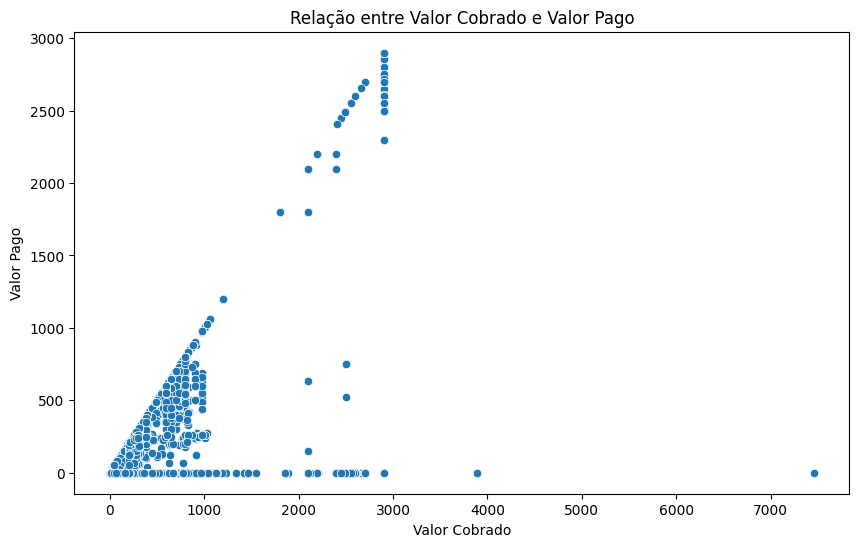

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_proc, x='Valor Cobrado', y='Valor Pago')
plt.title('Relação entre Valor Cobrado e Valor Pago')
plt.xlabel('Valor Cobrado')
plt.ylabel('Valor Pago')
plt.show()

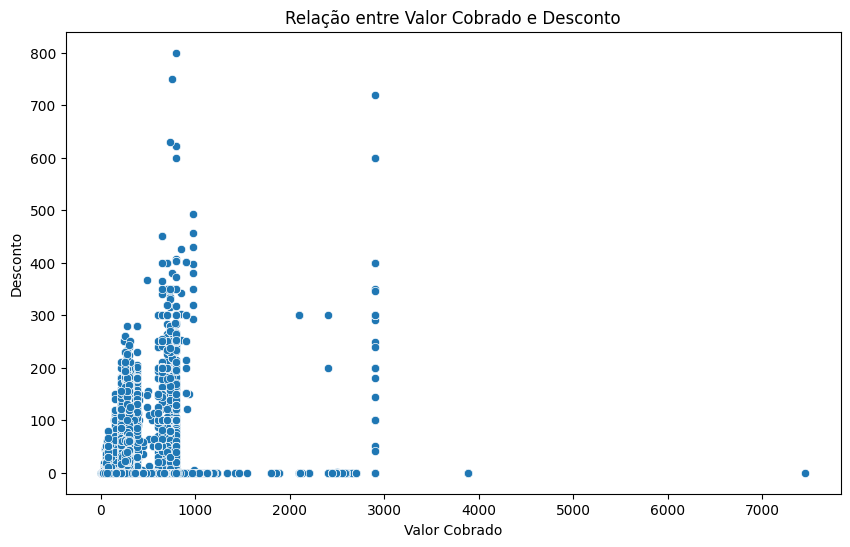

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_proc, x='Valor Cobrado', y='Desconto')
plt.title('Relação entre Valor Cobrado e Desconto')
plt.xlabel('Valor Cobrado')
plt.ylabel('Desconto')
plt.show()

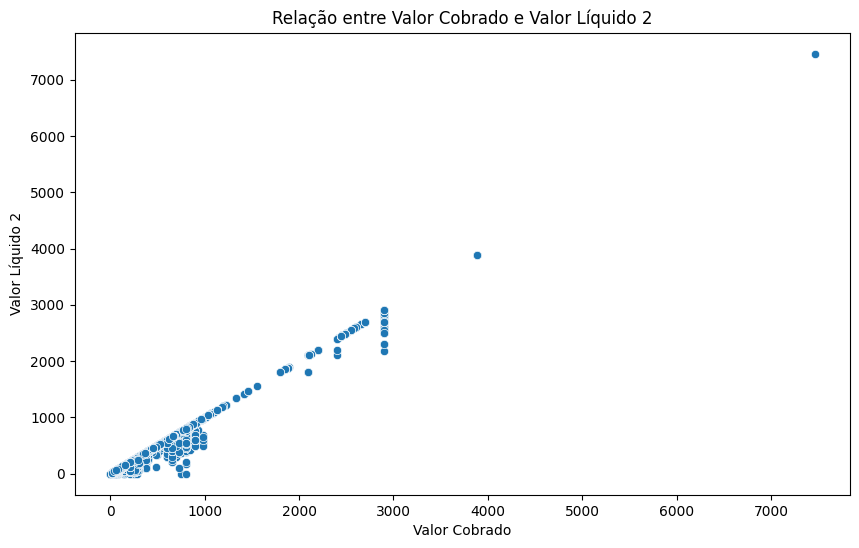

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_proc, x='Valor Cobrado', y='Valor Líquido 2')
plt.title('Relação entre Valor Cobrado e Valor Líquido 2')
plt.xlabel('Valor Cobrado')
plt.ylabel('Valor Líquido 2')
plt.show()

In [ ]:
print("Number of rows in df_custo:")
display(len(df_custo))

print("\nNumber of rows in df_proc:")
display(len(df_proc))

Number of rows in df_custo:


61


Number of rows in df_proc:


320441


#### Histogramas

##### Dependência de convênios

In [ ]:
df_dep = df_proc[df_proc["Tipo Convênio"] == "convênio de saúde"].copy()

In [ ]:
# Agregação: total por convênio
totais = (
    df_dep.groupby("Convênio", dropna=False)["Valor Líquido 2"]
          .sum()
          .sort_values(ascending=False)
)

total_geral = totais.sum()

In [ ]:
# Top 10 + % do total
top10 = totais.head(10)
df_top10 = (
    top10.to_frame("valor_liquido_total")
         .assign(pct_do_total=lambda d: 100 * d["valor_liquido_total"] / total_geral)
         .reset_index()
)

In [ ]:
print("Top 10 convênios por receita (Valor Líquido 2) e % do total:")
display(df_top10)

Top 10 convênios por receita (Valor Líquido 2) e % do total:


,Convênio,valor_liquido_total,pct_do_total
0,unimed,20585383.86,52.669104
1,ipasgo,10109821.77,25.866666
2,hapvida,1421426.14,3.636815
3,cassi,1263767.77,3.233436
4,geap,1069764.16,2.737064
5,imas,942864.55,2.412383
6,saude caixa,814580.55,2.084160
7,américa planos de saude,782180.76,2.001263
8,affego saude,622377.81,1.592396
9,celgmed,400780.99,1.025425


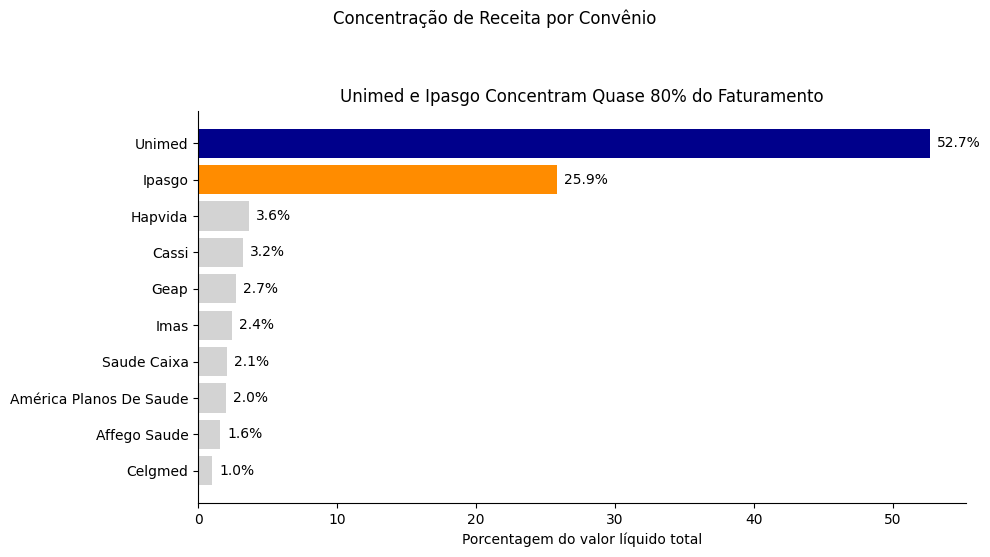

In [ ]:
plt.figure(figsize=(10,6))

# Define colors based on the top 2 conventions
colors = ['darkblue' if conv == 'unimed' else 'darkorange' if conv == 'ipasgo' else 'lightgrey' for conv in df_top10["Convênio"]]

bars = plt.barh(df_top10["Convênio"].str.title(), df_top10["pct_do_total"], color=colors) # Standardize capitalization

plt.gca().invert_yaxis()
plt.xlabel("Porcentagem do valor líquido total")
plt.title("Unimed e Ipasgo Concentram Quase 80% do Faturamento") # Updated title
plt.suptitle("Concentração de Receita por Convênio", y=0.95) # Added subtitle

# Remove top and right spines
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# adicionar os percentuais nas barras
for bar, pct in zip(bars, df_top10["pct_do_total"]):
    plt.text(
        bar.get_width() + 0.5,          # posição x (um pouco à frente da barra)
        bar.get_y() + bar.get_height()/2,  # posição y (meio da barra)
        f"{pct:.1f}%",                  # texto formatado
        va="center"
    )

plt.tight_layout(rect=[0, 0.03, 1, 0.9]) # Adjust layout to make space for suptitle
plt.show()

In [ ]:
# (Opcional) Curva acumulada para ver concentração
df_top10 = df_top10.sort_values("pct_do_total", ascending=False)
df_top10["% acumulado"] = df_top10["pct_do_total"].cumsum()
print("Acumulado dos Top 10 (% do total):")
display(df_top10[["Convênio","pct_do_total","% acumulado"]])

Acumulado dos Top 10 (% do total):


,Convênio,pct_do_total,% acumulado
0,unimed,52.669104,52.669104
1,ipasgo,25.866666,78.535770
2,hapvida,3.636815,82.172585
3,cassi,3.233436,85.406021
4,geap,2.737064,88.143085
5,imas,2.412383,90.555468
6,saude caixa,2.084160,92.639628
7,américa planos de saude,2.001263,94.640891
8,affego saude,1.592396,96.233287
9,celgmed,1.025425,97.258712


A análise de dependência por convênios mostra que a clínica tem forte concentração em dois planos: Unimed (mais de 50% do faturamento líquido) e Ipasgo (~25%). Juntos, eles representam cerca de 3/4 de toda a receita. Os demais convênios têm participações individuais muito pequenas (<5%). Esse resultado indica alta vulnerabilidade a alterações contratuais com esses dois convênios, reforçando a importância de estratégias para diversificação de receitas e fortalecimento da base de pacientes particulares

##### Sazonalidade

In [ ]:
df_proc["mesano"] = df_proc["Data"].dt.to_period("M").astype(str)

In [ ]:
# --- agregação
df_sazonal = (
    df_proc.groupby("mesano")
    .agg(qtd_exames=("Data","count"),
         receita=("Valor Líquido 2","sum"))
    .reset_index()
)


In [ ]:
# ordenar pelo mês/ano
df_sazonal["mesano"] = pd.to_datetime(df_sazonal["mesano"])
df_sazonal = df_sazonal.sort_values("mesano")

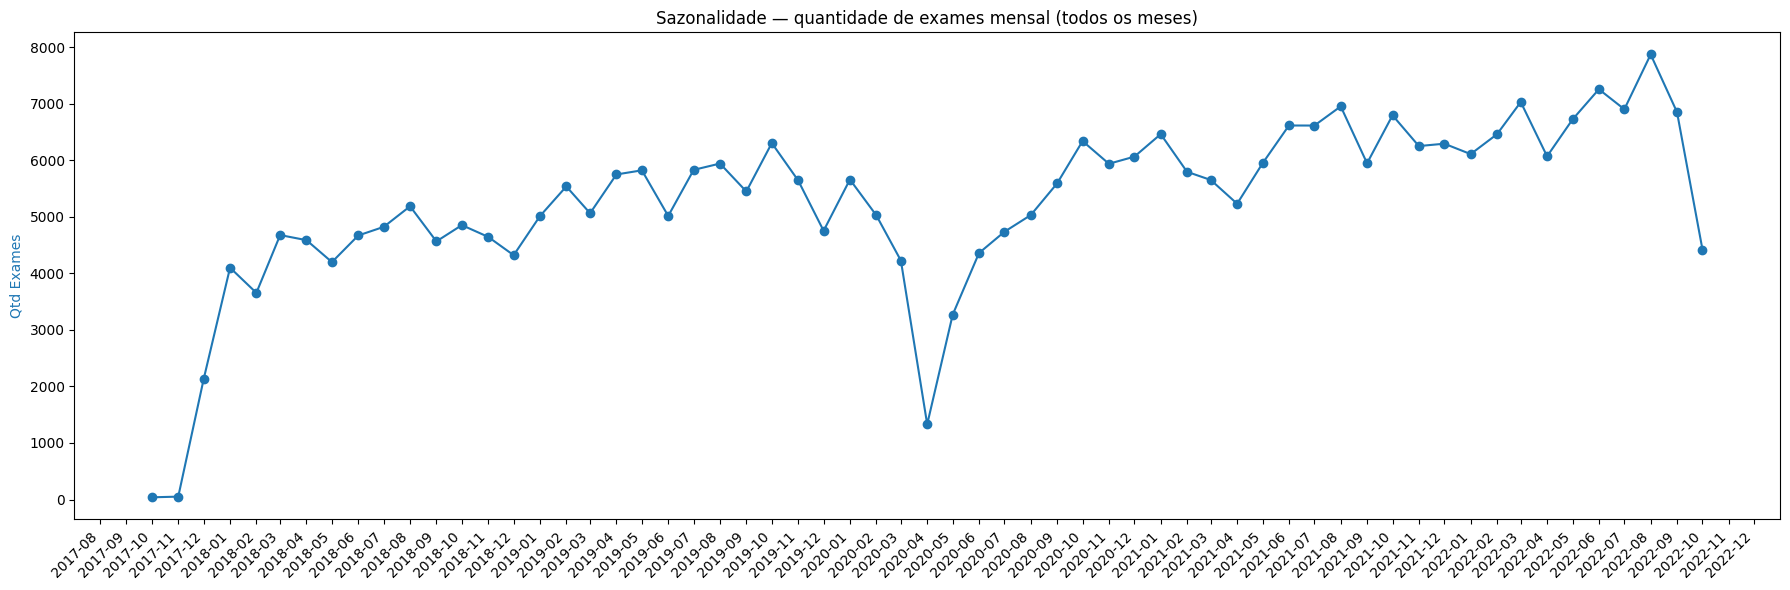

In [ ]:
# --- gráfico
fig, ax = plt.subplots(figsize=(18,6))  # aumentei a largura de 12 -> 18

# linha: quantidade de exames
ax.plot(df_sazonal["mesano"], df_sazonal["qtd_exames"], color="tab:blue", marker="o")
ax.set_ylabel("Qtd Exames", color="tab:blue")

# mostrar todos os meses (intervalo=1)
ax.xaxis.set_major_formatter(mdates.DateFormatter("%Y-%m"))
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=1))

plt.xticks(rotation=45, ha="right")
plt.title("Sazonalidade — quantidade de exames mensal (todos os meses)")
plt.tight_layout()
plt.show()

A análise da sazonalidade revela crescimento contínuo no número de exames entre 2018 e 2022, com valores que dobraram em média nesse período. Observa-se uma queda abrupta no início de 2020, provavelmente associada às restrições da pandemia, seguida de rápida recuperação. Além disso, há quedas recorrentes em meses de final/início de ano, o que indica padrão sazonal típico do setor de saúde. Em 2021–2022 o volume estabiliza em patamares elevados, acima de 6 mil exames mensais, evidenciando consolidação da demanda.

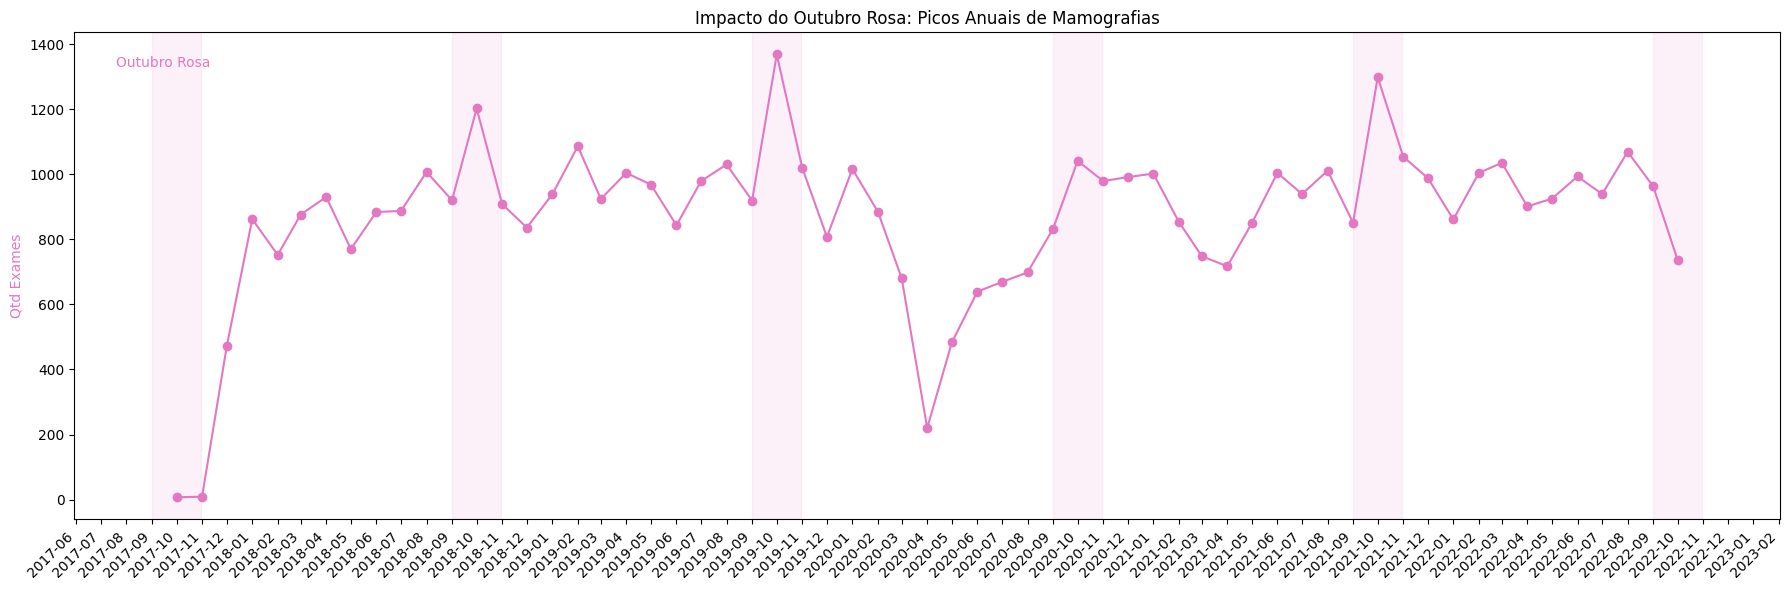

In [ ]:
# --- Filtrar apenas mamografia ---
df_temp = df_proc[df_proc["Modalidade"].str.strip().str.upper() == "MAMOGRAFIA"].copy()

# --- Criar coluna mesano (ano-mês) ---
df_temp["mesano"] = df_temp["Data"].dt.to_period("M").astype(str)

# --- Agregar por mês/ano ---
df_sazonal = (
    df_temp.groupby("mesano")
           .agg(qtd_exames=("Data", "count"))
           .reset_index()
)

# --- Ordenar por tempo ---
df_sazonal["mesano"] = pd.to_datetime(df_sazonal["mesano"])
df_sazonal = df_sazonal.sort_values("mesano")

# --- Gráfico ---
fig, ax = plt.subplots(figsize=(18,6))
ax.plot(df_sazonal["mesano"], df_sazonal["qtd_exames"], marker="o", color="tab:pink")
ax.set_ylabel("Qtd Exames", color="tab:pink")
ax.set_title("Impacto do Outubro Rosa: Picos Anuais de Mamografias")

# Eixo X: mostrar todos os meses (YYYY-MM)
ax.xaxis.set_major_formatter(mdates.DateFormatter("%Y-%m"))
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
plt.xticks(rotation=45, ha="right")

# --- Sombrear SETEMBRO + OUTUBRO (para centralizar Outubro Rosa) ---
for ano in df_sazonal["mesano"].dt.year.unique():
    ax.axvspan(pd.Timestamp(f"{ano}-09-01"),
               pd.Timestamp(f"{ano}-10-31"),
               alpha=0.10, color="tab:pink")

# Rótulo (Outubro Rosa) no primeiro ano
primeiro_ano = int(df_sazonal["mesano"].dt.year.min())
ax.text(pd.Timestamp(f"{primeiro_ano}-09-15"),
        ax.get_ylim()[1]*0.95,
        "Outubro Rosa", color="tab:pink",
        ha="center", va="top", fontsize=10)

plt.tight_layout()
plt.show()

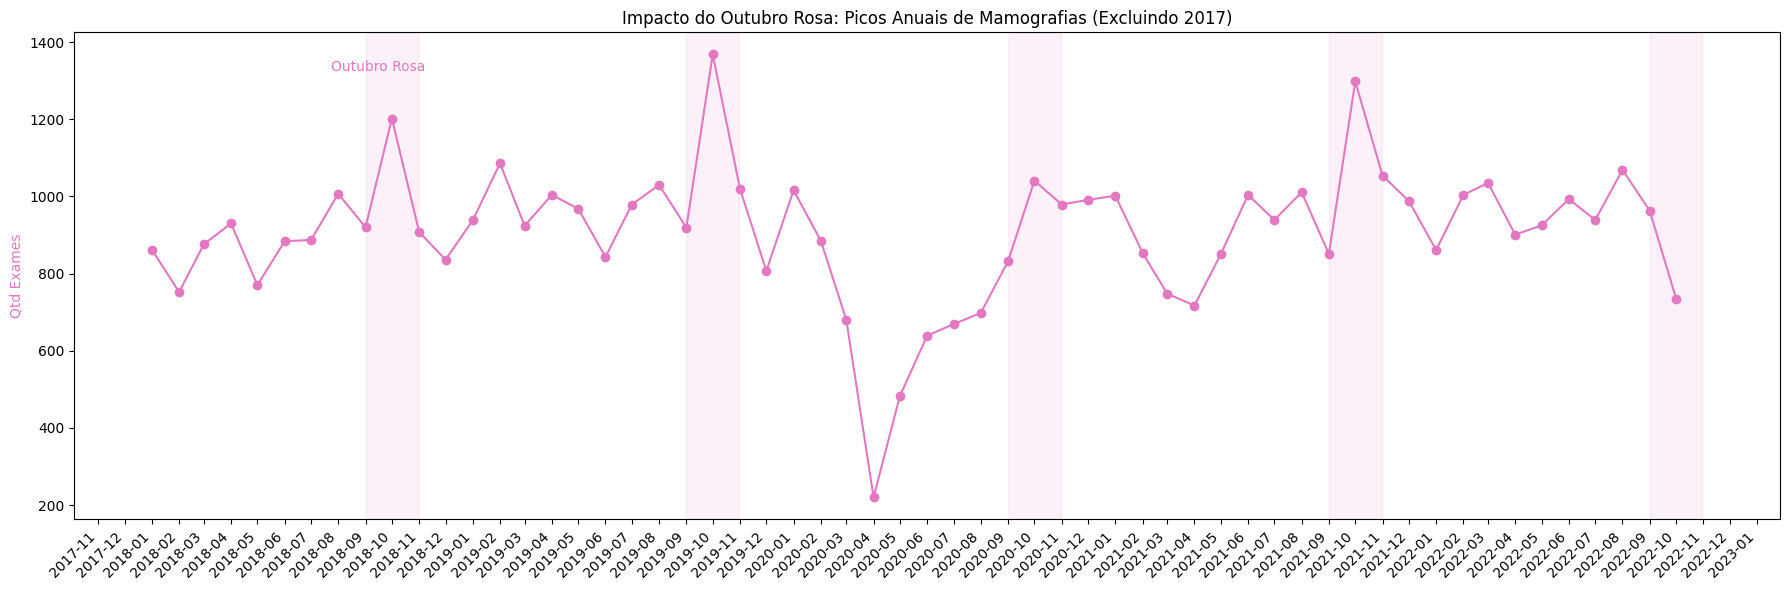

In [ ]:
# --- Filtrar apenas mamografia ---
df_temp = df_proc[df_proc["Modalidade"].str.strip().str.upper() == "MAMOGRAFIA"].copy()

# Filter for years greater than 2017
df_temp = df_temp[df_temp['Data'].dt.year > 2017]

# --- Criar coluna mesano (ano-mês) ---
df_temp["mesano"] = df_temp["Data"].dt.to_period("M").astype(str)

# --- Agregar por mês/ano ---
df_sazonal = (
    df_temp.groupby("mesano")
           .agg(qtd_exames=("Data", "count"))
           .reset_index()
)

# --- Ordenar por tempo ---
df_sazonal["mesano"] = pd.to_datetime(df_sazonal["mesano"])
df_sazonal = df_sazonal.sort_values("mesano")

# --- Gráfico ---
fig, ax = plt.subplots(figsize=(18,6))

ax.plot(df_sazonal["mesano"], df_sazonal["qtd_exames"], marker="o", color="tab:pink")
ax.set_ylabel("Qtd Exames", color="tab:pink")
ax.set_title("Impacto do Outubro Rosa: Picos Anuais de Mamografias (Excluindo 2017)") # Updated title to reflect the change

# Eixo X: mostrar todos os meses (YYYY-MM)
ax.xaxis.set_major_formatter(mdates.DateFormatter("%Y-%m"))
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
plt.xticks(rotation=45, ha="right")

# --- Sombrear SETEMBRO + OUTUBRO (para centralizar Outubro Rosa) ---
for ano in df_sazonal["mesano"].dt.year.unique():
    ax.axvspan(pd.Timestamp(f"{ano}-09-01"),
               pd.Timestamp(f"{ano}-10-31"),
               alpha=0.10, color="tab:pink")

# Rótulo (Outubro Rosa) no primeiro ano
primeiro_ano = int(df_sazonal["mesano"].dt.year.min())
ax.text(pd.Timestamp(f"{primeiro_ano}-09-15"),
        ax.get_ylim()[1]*0.95,
        "Outubro Rosa", color="tab:pink",
        ha="center", va="top", fontsize=10)

plt.tight_layout()
plt.show()

Os exames de mamografia apresentaram crescimento consistente até 2019, alcançando picos superiores a 1.200 exames mensais. Em 2020 houve queda expressiva devido à pandemia, com posterior recuperação, embora marcada por oscilações. Destaca-se ainda a elevação em alguns meses de outubro, possivelmente relacionada à campanha do Outubro Rosa, evidenciando a influência de ações de conscientização na demanda por esse procedimento.

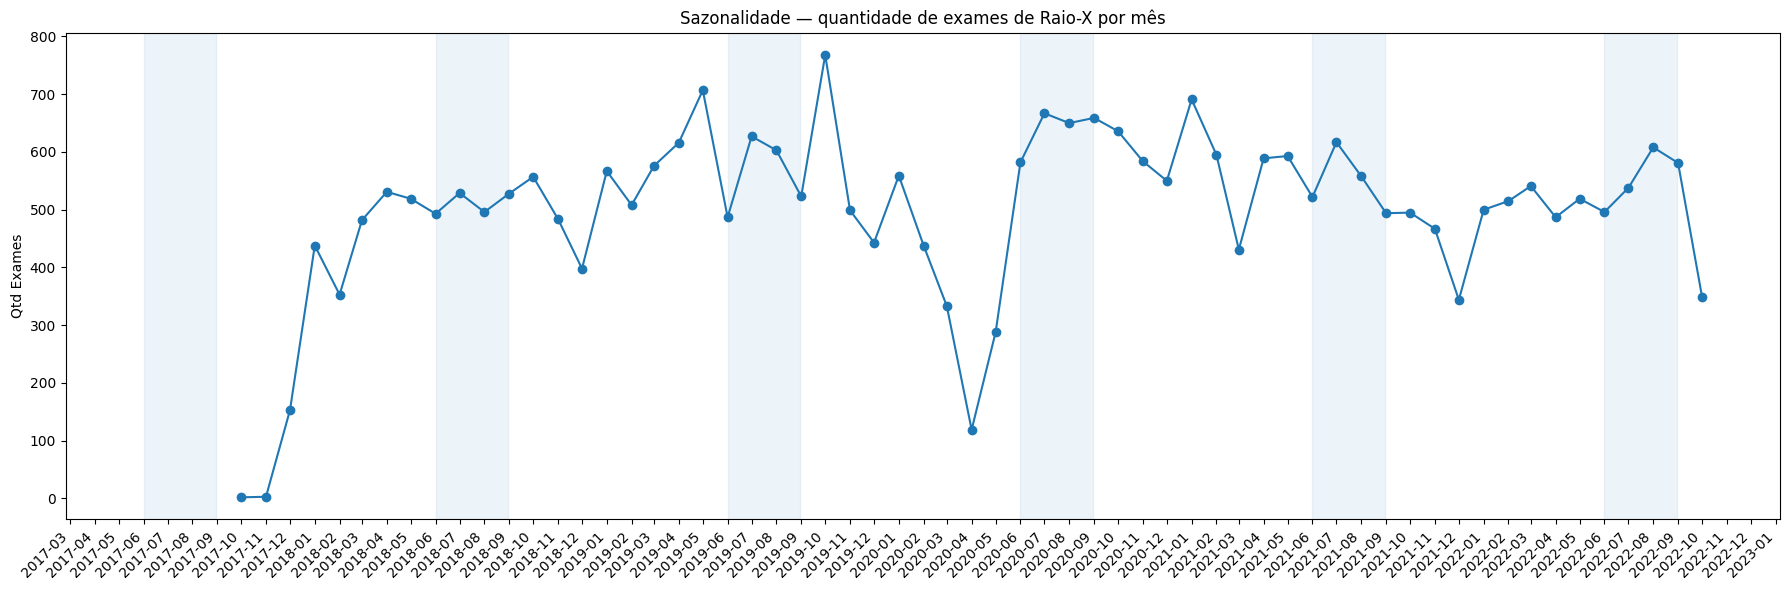

In [ ]:
df_rx = df_proc[df_proc["Modalidade"].str.strip().str.upper().isin(["RAIO-X","RAIO X"])].copy()

df_rx["mesano"] = df_rx["Data"].dt.to_period("M").astype(str)
df_rx_saz = (
    df_rx.groupby("mesano")
         .agg(qtd_exames=("Data","count"))
         .reset_index()
)
df_rx_saz["mesano"] = pd.to_datetime(df_rx_saz["mesano"])
df_rx_saz = df_rx_saz.sort_values("mesano")

# --- gráfico ---
fig, ax = plt.subplots(figsize=(18,6))
ax.plot(df_rx_saz["mesano"], df_rx_saz["qtd_exames"], marker="o", color="tab:blue")
ax.set_ylabel("Qtd Exames")
ax.set_title("Sazonalidade — quantidade de exames de Raio-X por mês")

# eixo X (todos os meses)
ax.xaxis.set_major_formatter(mdates.DateFormatter("%Y-%m"))
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
plt.xticks(rotation=45, ha="right")

# (opcional) sombrear meses de inverno: jun–ago
for ano in df_rx_saz["mesano"].dt.year.unique():
    ax.axvspan(pd.Timestamp(f"{ano}-06-01"), pd.Timestamp(f"{ano}-08-31"),
               alpha=0.08, color="tab:blue")

plt.tight_layout()
plt.show()

Os exames de Raio-X apresentam uma tendência geral de crescimento até 2019, com picos acima de 700 exames mensais. Há queda brusca em 2020 devido à pandemia, seguida de recuperação parcial. Nota-se ainda que, em diversos anos, os meses de inverno (junho–agosto) concentram maior volume de exames, possivelmente relacionados a doenças respiratórias sazonais. No período pós-pandemia, observa-se estabilização em patamares intermediários (500–600 exames/mês).

##### Particular vs Convênio.

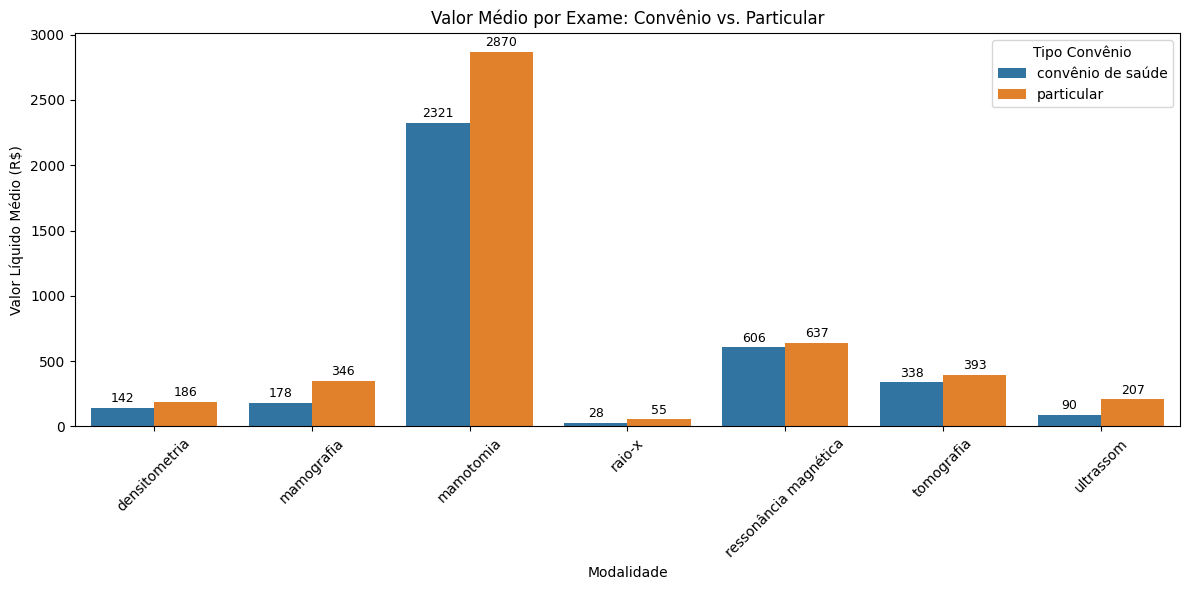

In [ ]:
# filtrar apenas convênio de saúde e particular
df_comp = df_proc[df_proc["Tipo Convênio"].isin(["convênio de saúde","particular"])].copy()

# agrupar por modalidade + tipo de convênio (média do valor líquido 2)
df_comp_agg = (
    df_comp.groupby(["Modalidade","Tipo Convênio"])["Valor Líquido 2"]
    .mean()
    .reset_index()
)

# --- gráfico de barras lado a lado
plt.figure(figsize=(12,6))
ax = sns.barplot(
    data=df_comp_agg,
    x="Modalidade", y="Valor Líquido 2",
    hue="Tipo Convênio"
)

# adicionar os valores nas barras (na horizontal)
for container in ax.containers:
    ax.bar_label(container, fmt="%.0f", label_type="edge", fontsize=9, rotation=0, padding=2)

plt.xticks(rotation=45)
plt.title("Valor Médio por Exame: Convênio vs. Particular")
plt.ylabel("Valor Líquido Médio (R$)")
plt.xlabel("Modalidade")
plt.legend(title="Tipo Convênio")
plt.tight_layout()
plt.show()


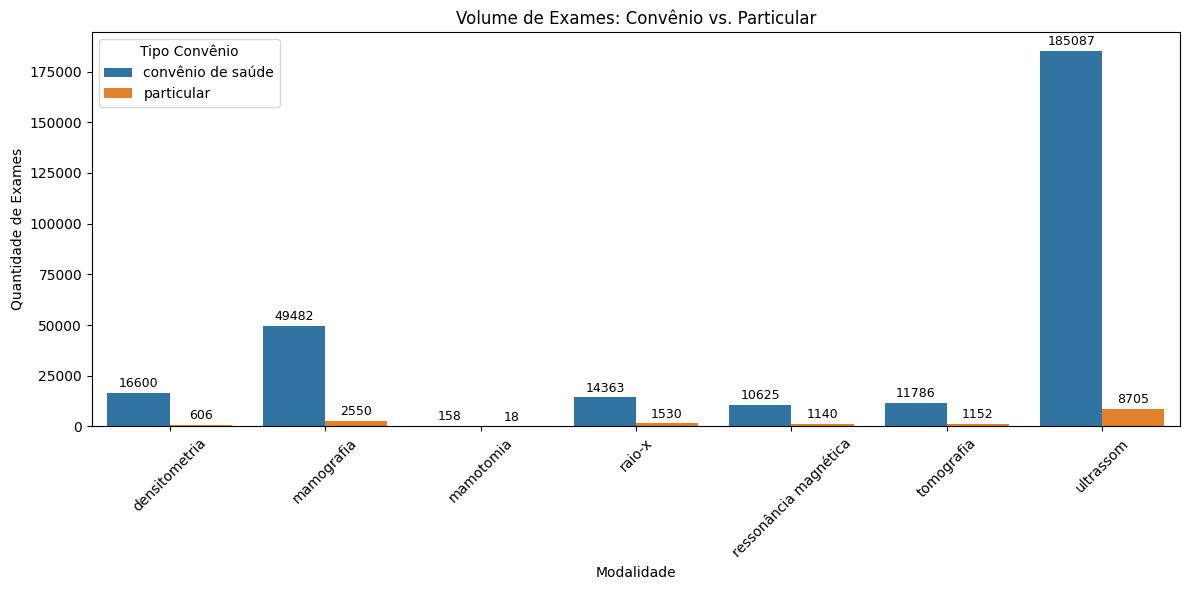

In [ ]:
# agrupar por modalidade + tipo de convênio (contagem de exames)
df_comp_qtd = (
    df_comp.groupby(["Modalidade","Tipo Convênio"])["Data"]
    .count()
    .reset_index(name="qtd_exames")
)

# gráfico de barras lado a lado
plt.figure(figsize=(12,6))
ax = sns.barplot(
    data=df_comp_qtd,
    x="Modalidade", y="qtd_exames",
    hue="Tipo Convênio"
)

# adicionar os valores nas barras (na horizontal)
for container in ax.containers:
    ax.bar_label(container, fmt="%.0f", label_type="edge", fontsize=9, rotation=0, padding=2)

plt.xticks(rotation=45)
plt.title("Volume de Exames: Convênio vs. Particular")
plt.ylabel("Quantidade de Exames")
plt.xlabel("Modalidade")
plt.legend(title="Tipo Convênio")
plt.tight_layout()
plt.show()


A clínica depende fortemente dos convênios para manter volume e faturamento recorrente, mas os particulares são essenciais para rentabilidade. Uma estratégia interessante seria tentar atrair mais particulares em modalidades de alta demanda (ex.: ultrassom, mamografia e tomografia), onde o ganho unitário é expressivo.

In [ ]:
# Caminho para salvar o arquivo limpo no Google Drive
output_file_path = '/content/drive/MyDrive/ProjetodeCiênciadeDados/dt_procedimentons_cleaned.csv'

# Salvar o DataFrame limpo em um novo arquivo CSV
df_proc.to_csv(output_file_path, index=False)

print(f"Dataset limpo salvo em: {output_file_path}")

Dataset limpo salvo em: /content/drive/MyDrive/ProjetodeCiênciadeDados/dt_procedimentons_cleaned.csv


/tmp/ipython-input-4147804351.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=tipo_convenio_percentages.index, y=tipo_convenio_percentages.values, palette='viridis')


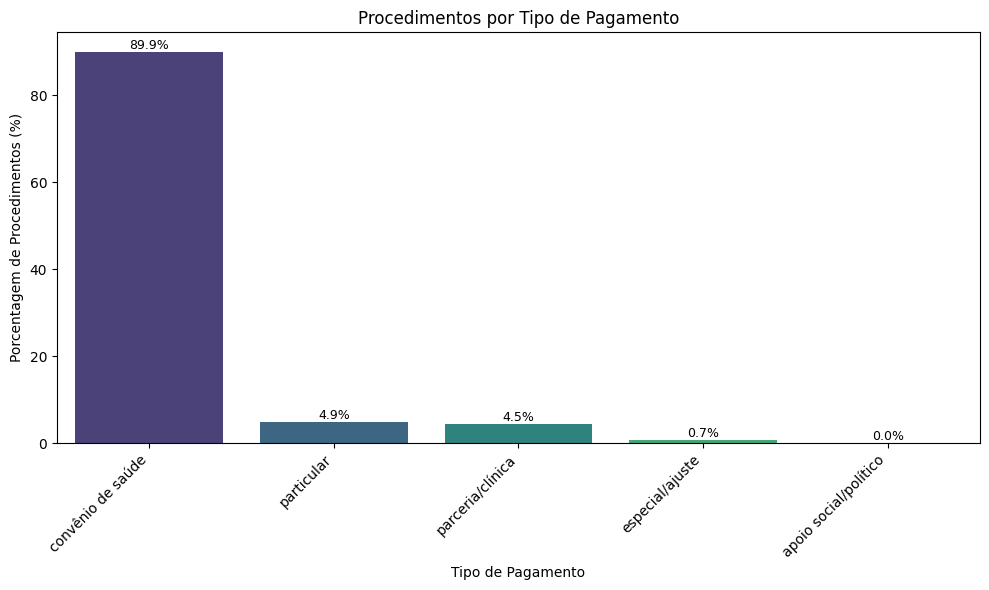

In [ ]:
# Calculate the percentage of procedures for each 'Tipo Convênio'
tipo_convenio_percentages = df_proc['Tipo Convênio'].value_counts(normalize=True) * 100

# Create a bar plot
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=tipo_convenio_percentages.index, y=tipo_convenio_percentages.values, palette='viridis')
plt.title('Procedimentos por Tipo de Pagamento')
plt.xlabel('Tipo de Pagamento')
plt.ylabel('Porcentagem de Procedimentos (%)')
plt.xticks(rotation=45, ha='right')

# Add data labels
for container in ax.containers:
    ax.bar_label(container, fmt='%.1f%%', label_type='edge', fontsize=9)

plt.tight_layout()
plt.show()

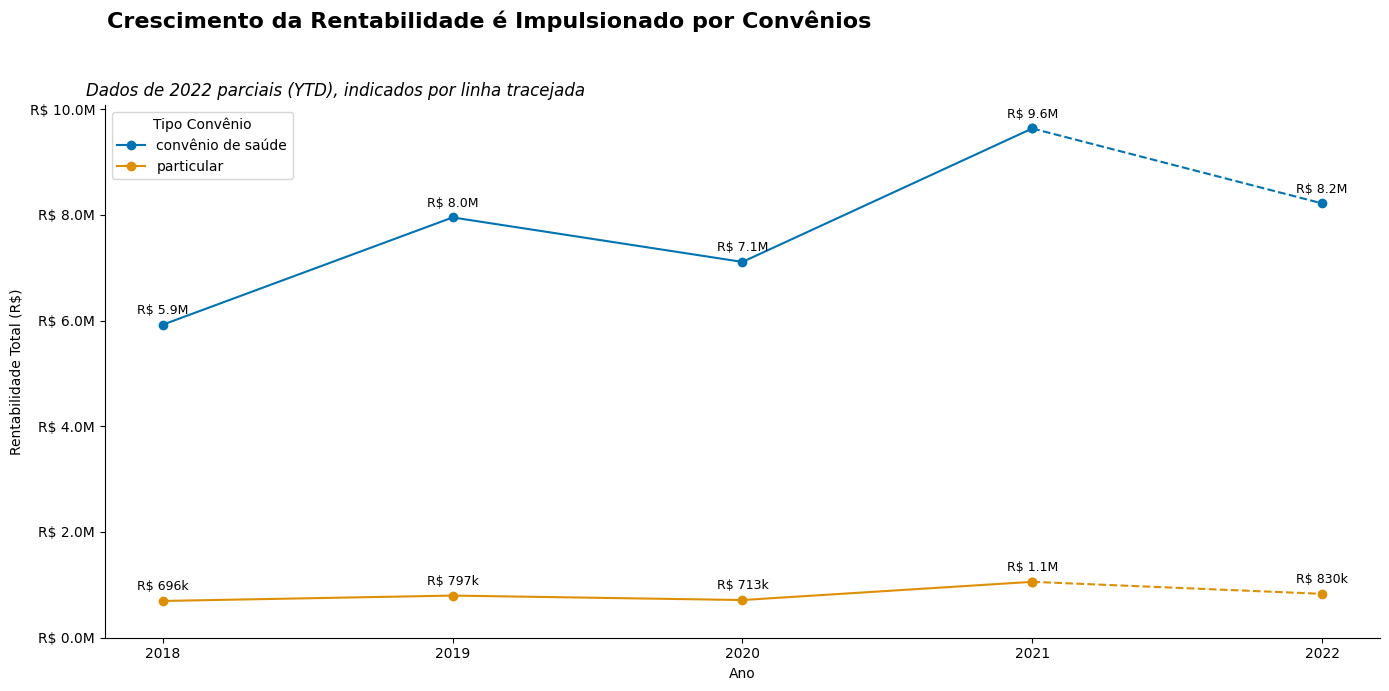

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as mticker
df_proc['Ano'] = df_proc['Data'].dt.year
revenue_by_tipo_convenio_annual = df_proc.groupby(['Ano', 'Tipo Convênio'])['Valor Líquido 2'].sum().reset_index()
df_main = revenue_by_tipo_convenio_annual[revenue_by_tipo_convenio_annual['Tipo Convênio'].isin(['convênio de saúde', 'particular'])]
df_main = df_main[df_main['Ano'] > 2017]

def format_currency(value):
    if value >= 1_000_000:
        return f'R$ {value / 1_000_000:.1f}M'
    elif value >= 1_000:
        return f'R$ {value / 1000:.0f}k'
    else:
        return f'R$ {value:.0f}'

# --- LÓGICA DE PLOTAGEM CORRIGIDA ---

# Criar a figura e os eixos
fig, ax1 = plt.subplots(figsize=(14, 7))

# Obter as cores que o Seaborn usaria para manter a consistência
colors = sns.color_palette('colorblind', n_colors=len(df_main['Tipo Convênio'].unique()))
color_map = dict(zip(df_main['Tipo Convênio'].unique(), colors))

# Loop para plotar cada categoria separadamente
for convenio, group in df_main.groupby('Tipo Convênio'):
    # 1. Separar os dados em parte sólida e parte tracejada
    dados_solidos = group[group['Ano'] <= 2021]
    dados_tracejados = group[(group['Ano'] >= 2021) & (group['Ano'] <= 2022)]

    cor = color_map[convenio]

    # 2. Plotar a parte sólida (até 2021)
    ax1.plot(dados_solidos['Ano'], dados_solidos['Valor Líquido 2'],
             marker='o', linestyle='-', color=cor, label=convenio) # Set label for each category

    # 3. Plotar a parte tracejada (de 2021 a 2022)
    if not dados_tracejados.empty:
        ax1.plot(dados_tracejados['Ano'], dados_tracejados['Valor Líquido 2'],
                 marker='o', linestyle='--', color=cor)

    # 4. Adicionar rótulos de dados para o grupo inteiro
    for x, y in zip(group['Ano'], group['Valor Líquido 2']):
        ax1.text(x, y + (ax1.get_ylim()[1] * 0.015), format_currency(y), ha='center', va='bottom', fontsize=9)

# --- Configurações Finais (mantidas e melhoradas) ---

# Título e Subtítulo (melhor prática de alinhamento)
fig.suptitle("Crescimento da Rentabilidade é Impulsionado por Convênios",
             ha='left', x=0.08, y=0.98, fontsize=16, fontweight='bold')
ax1.set_title("Dados de 2022 parciais (YTD), indicados por linha tracejada",
              ha='left', x=-0.015, y=1.0, fontsize=12, style='italic')


ax1.set_ylabel('Rentabilidade Total (R$)')
ax1.set_xlabel('Ano')

# Formatar o eixo Y para melhorar a leitura
ax1.get_yaxis().set_major_formatter(mticker.FuncFormatter(lambda x, p: f'R$ {x/1_000_000:.1f}M'))
ax1.set_ylim(bottom=0) # Garantir que o eixo Y comece em 0

ax1.legend(title='Tipo Convênio')
ax1.grid(False) # Removido o grid para um look mais limpo, já que temos os rótulos
plt.xticks(sorted(df_main['Ano'].unique()))

# Remover bordas superior e direita
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)

# Adicionar nota de rodapé
# (O subtítulo já cumpre essa função de forma mais integrada, mas se ainda quiser, pode descomentar a linha abaixo)
# fig.text(0.01, 0.01, "*Dados de 2022 parciais (YTD)*", ha='left', fontsize=10)

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

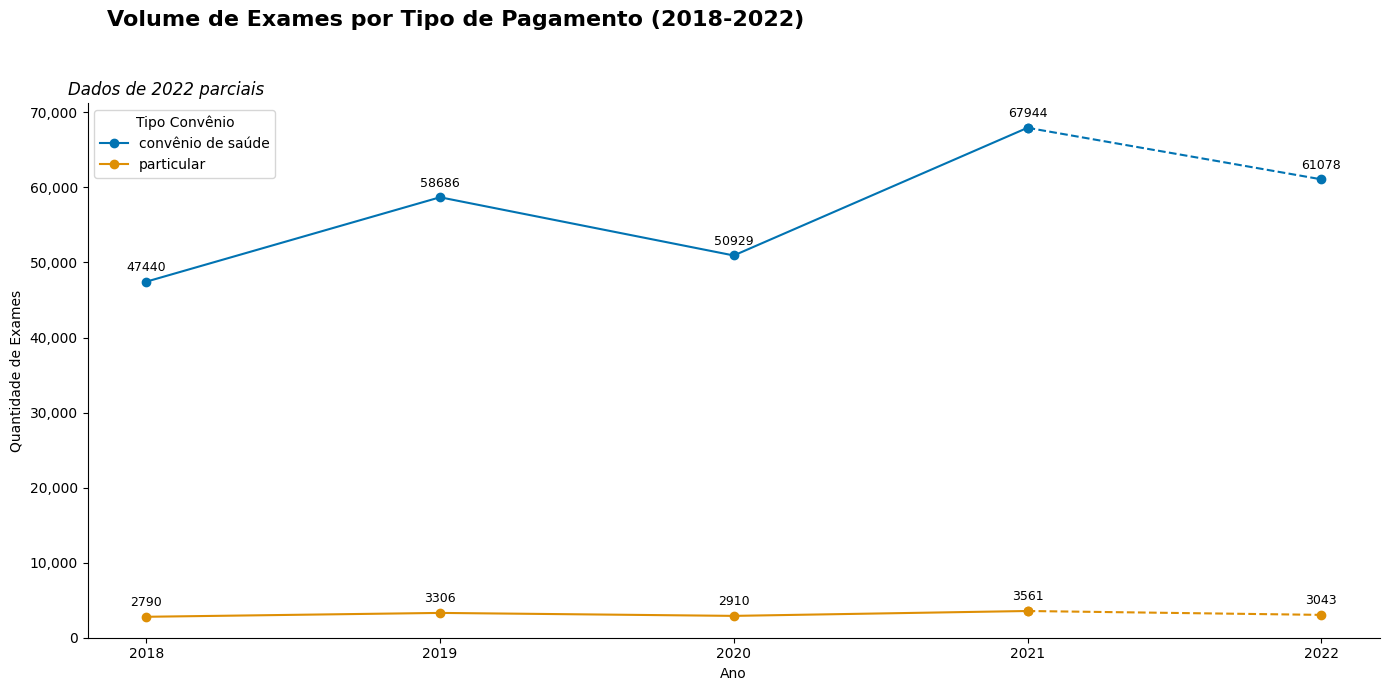

In [ ]:
df_proc['Ano'] = df_proc['Data'].dt.year
quantity_by_tipo_convenio_annual = df_proc.groupby(['Ano', 'Tipo Convênio'])['Qtd'].sum().reset_index()
df_main_qtd = quantity_by_tipo_convenio_annual[quantity_by_tipo_convenio_annual['Tipo Convênio'].isin(['convênio de saúde', 'particular'])]
df_main_qtd = df_main_qtd[df_main_qtd['Ano'] > 2017]

# --- LÓGICA DE PLOTAGEM ---

# Criar a figura e os eixos
fig, ax1 = plt.subplots(figsize=(14, 7))

# Obter as cores que o Seaborn usaria para manter a consistência
colors = sns.color_palette('colorblind', n_colors=len(df_main_qtd['Tipo Convênio'].unique()))
color_map = dict(zip(df_main_qtd['Tipo Convênio'].unique(), colors))

# Loop para plotar cada categoria separadamente
for convenio, group in df_main_qtd.groupby('Tipo Convênio'):
    # 1. Separar os dados em parte sólida e parte tracejada
    dados_solidos = group[group['Ano'] <= 2021]
    dados_tracejados = group[(group['Ano'] >= 2021) & (group['Ano'] <= 2022)]

    cor = color_map[convenio]

    # 2. Plotar a parte sólida (até 2021)
    ax1.plot(dados_solidos['Ano'], dados_solidos['Qtd'],
             marker='o', linestyle='-', color=cor, label=convenio) # Label for each category

    # 3. Plotar a parte tracejada (de 2021 a 2022)
    if not dados_tracejados.empty:
        ax1.plot(dados_tracejados['Ano'], dados_tracejados['Qtd'],
                 marker='o', linestyle='--', color=cor)

    # 4. Adicionar rótulos de dados para o grupo inteiro
    for x, y in zip(group['Ano'], group['Qtd']):
        ax1.text(x, y + (ax1.get_ylim()[1] * 0.015), f'{y:.0f}', ha='center', va='bottom', fontsize=9) # Format as integer

# --- Configurações Finais (mantidas e melhoradas) ---

# Título e Subtítulo
fig.suptitle("Volume de Exames por Tipo de Pagamento (2018-2022)", # Updated title
             ha='left', x=0.08, y=0.98, fontsize=16, fontweight='bold')
ax1.set_title("Dados de 2022 parciais",
              ha='left', x=-0.015, y=1.0, fontsize=12, style='italic')


ax1.set_ylabel('Quantidade de Exames')
ax1.set_xlabel('Ano')

# Formatar o eixo Y (sem formato de moeda)
ax1.get_yaxis().set_major_formatter(mticker.FuncFormatter(lambda x, p: f'{x:,.0f}'))
ax1.set_ylim(bottom=0) # Garantir que o eixo Y comece em 0

ax1.legend(title='Tipo Convênio')
ax1.grid(False) # Removido o grid
plt.xticks(sorted(df_main_qtd['Ano'].unique()))

# Remover bordas superior e direita
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

/tmp/ipython-input-2624738259.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=procedencia_percentages.values, y=procedencia_percentages.index, palette='viridis')


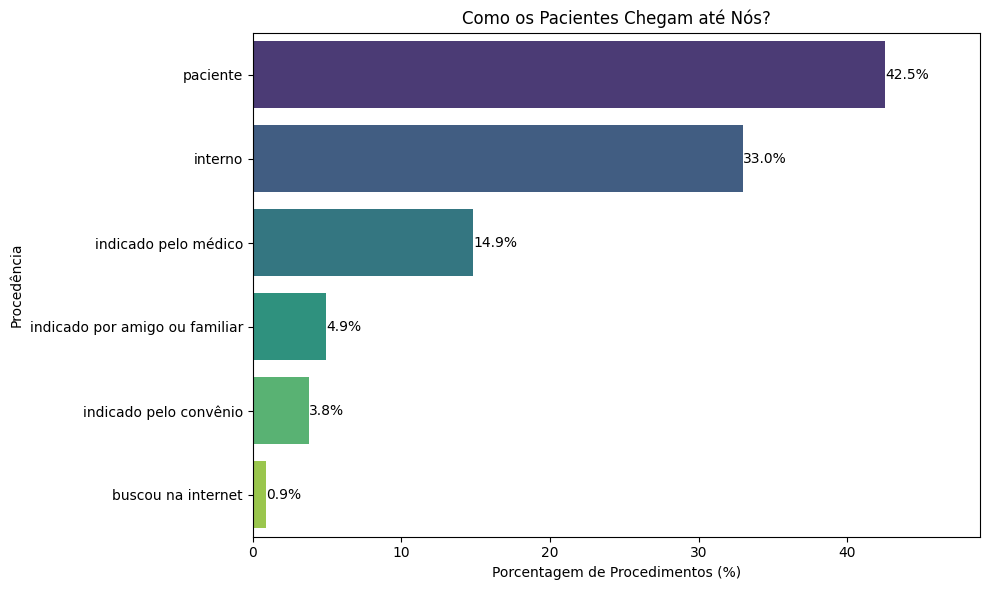

In [ ]:
# Calculate the percentage of procedures for each 'Procedência'
procedencia_percentages = df_proc['Procedência'].value_counts(normalize=True) * 100

# Create a bar plot for percentages
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=procedencia_percentages.values, y=procedencia_percentages.index, palette='viridis')
plt.title('Como os Pacientes Chegam até Nós?')
plt.xlabel('Porcentagem de Procedimentos (%)')
plt.ylabel('Procedência')

# Add data labels
for i, v in enumerate(procedencia_percentages.values):
    ax.text(v, i, f'{v:.1f}%', va='center', ha='left')

# Adjust x-axis limit dynamically
max_value = procedencia_percentages.max()
plt.xlim(0, max_value * 1.15) # Add 15% padding to the max value

plt.tight_layout()
plt.show()

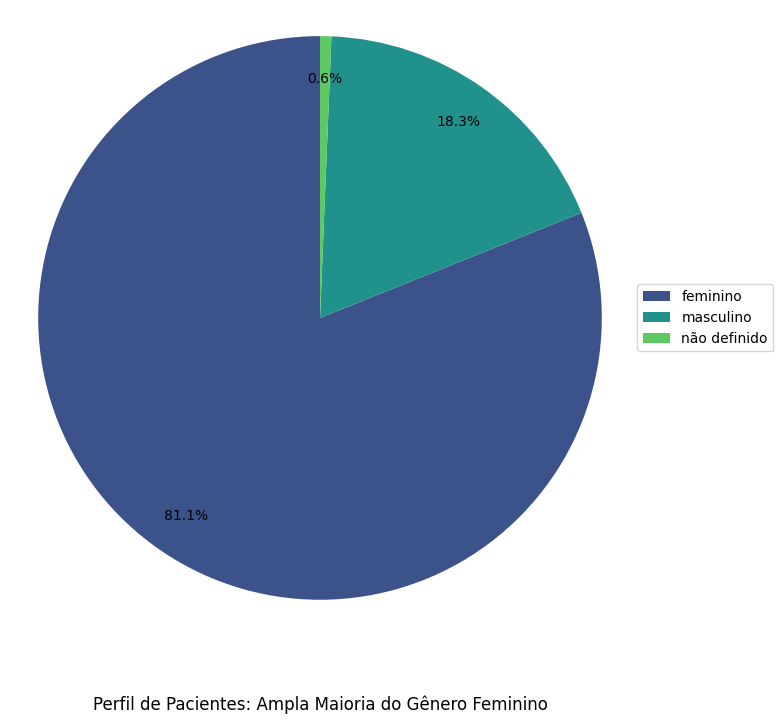

In [ ]:
# Get unique patients and their genders
unique_patients = df_proc.drop_duplicates(subset=['Paciente'])

# Count the occurrences of each gender for unique patients
gender_counts_unique = unique_patients['Sexo Paciente'].value_counts()

# Create a pie chart for unique patients
plt.figure(figsize=(8, 8))
plt.pie(gender_counts_unique, labels=None, autopct='%1.1f%%', startangle=90, colors=sns.color_palette('viridis', len(gender_counts_unique)), pctdistance=0.85) # Remove labels from pie and adjust pctdistance
plt.title('Perfil de Pacientes: Ampla Maioria do Gênero Feminino', y=-0.15) # Move title below the chart and update title
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.legend(labels=gender_counts_unique.index, loc='center left', bbox_to_anchor=(1, 0.5)) # Add legend outside the pie
plt.show()

## Formulação e Refinamento de Perguntas de Negócio

# Preparação dos Dados da Modelagem

## Seleção de atributos relevantes

In [2]:
import pandas as pd

df = pd.read_csv("./dt_procedimentons_cleaned.csv")

df["Data"] = pd.to_datetime(df["Data"], errors="coerce")

df["mes"] = df["Data"].dt.to_period("M").apply(lambda r: r.start_time)

df_sem = (
    df.groupby(["mes", "Modalidade", "Convênio", "Procedência", "Sexo Paciente"])
      .size()
      .reset_index(name="quantidade")
)

df_sem = df_sem.sort_values(by=["mes", "Modalidade", "Convênio", "Procedência", "Sexo Paciente"]).reset_index(drop=True)


## Criação de novas variáveis (engenharia de features)


In [3]:
df_sem["qtd_anterior"] = (
    df_sem.groupby(["Modalidade", "Convênio", "Procedência", "Sexo Paciente"])["quantidade"].shift(1)
)

df_sem["qtd_anterior"] = df_sem["qtd_anterior"].fillna(0)


## Transformações de dados

In [4]:
df_sem.columns = df_sem.columns.str.replace(' ', '_')

print(df_sem.head(10))

         mes     Modalidade                 Convênio Procedência  \
0 2017-10-01  densitometria             affego saude     interno   
1 2017-10-01  densitometria                     samp     interno   
2 2017-10-01     mamografia                     amil     interno   
3 2017-10-01     mamografia  américa planos de saude     interno   
4 2017-10-01     mamografia                   caesan     interno   
5 2017-10-01     mamografia                    cassi     interno   
6 2017-10-01     mamografia                  planmed     interno   
7 2017-10-01         raio-x                   caesan     interno   
8 2017-10-01         raio-x                   unimed     interno   
9 2017-10-01     tomografia              caeme saude     interno   

  Sexo_Paciente  quantidade  qtd_anterior  
0      feminino           1           0.0  
1      feminino           1           0.0  
2      feminino           2           0.0  
3      feminino           2           0.0  
4      feminino           1    

# Modelagem

## Divisão dos dados (treino/teste)

In [5]:
from pycaret.regression import *

# inicializar o experimento
exp_reg = setup(
    data=df_sem,
    target="quantidade",
    categorical_features=["Modalidade", "Convênio", "Procedência", "Sexo_Paciente"],
    numeric_features=["qtd_anterior"],
    ignore_features=["mes"],   # se quiser ignorar a data bruta
    train_size=0.8,               # 80% treino, 20% teste
    session_id=42
)

,Description,Value
0,Session id,42
1,Target,quantidade
2,Target type,Regression
3,Original data shape,"(15656, 7)"
4,Transformed data shape,"(15656, 19)"
5,Transformed train set shape,"(12524, 19)"
6,Transformed test set shape,"(3132, 19)"
7,Ignore features,1
8,Numeric features,1
9,Categorical features,4


## Treinamento e avaliação de modelos

## Escolha do algoritmo/modelo adequado

In [6]:
best_model = compare_models()       # testa vários modelos
print(best_model)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
huber,Huber Regressor,5.9493,670.2217,24.7720,0.9146,0.6043,0.7767,0.1760
lr,Linear Regression,6.3106,674.8891,24.8207,0.9137,0.6293,1.0711,0.0980
ridge,Ridge Regression,6.3100,674.8856,24.8206,0.9137,0.6293,1.0708,0.0980
lar,Least Angle Regression,6.3103,674.8864,24.8206,0.9137,0.6293,1.0711,0.1070
br,Bayesian Ridge,6.1872,674.8644,24.8151,0.9137,0.6225,0.9838,0.1310
lasso,Lasso Regression,6.1069,675.6524,24.8264,0.9135,0.6149,0.9234,0.0980
en,Elastic Net,6.1092,675.6524,24.8267,0.9135,0.6161,0.9239,0.0990
llar,Lasso Least Angle Regression,6.1068,675.6524,24.8264,0.9135,0.6149,0.9234,0.0980
omp,Orthogonal Matching Pursuit,6.0378,676.1634,24.8293,0.9134,0.5931,0.9117,0.0980
lightgbm,Light Gradient Boosting Machine,6.2208,748.9396,26.2484,0.9070,0.5561,0.8849,0.1030


HuberRegressor()


## Ajuste de hiperparâmetros

In [7]:
tuned_model = tune_model(best_model)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,6.1181,544.4537,23.3335,0.9622,0.6142,0.7969
1,5.2856,284.5685,16.8692,0.9405,0.5761,0.7618
2,6.0648,644.0729,25.3786,0.9429,0.6088,0.7976
3,5.6931,360.6054,18.9896,0.9741,0.5857,0.7361
4,5.2543,376.3091,19.3987,0.9445,0.5934,0.7478
5,5.6357,405.1516,20.1284,0.9105,0.6317,0.8578
6,6.8295,1937.2321,44.0140,0.6580,0.6463,0.8256
7,6.3867,514.6902,22.6868,0.9644,0.6034,0.7934
8,6.0175,614.5236,24.7896,0.9351,0.5916,0.8265


Fitting 10 folds for each of 10 candidates, totalling 100 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


# Avaliação

## Avaliação da performance com métricas

In [8]:
evaluate_model(tuned_model)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

## Revisão dos objetivos de negócio

In [9]:
predict_model(tuned_model)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Huber Regressor,6.7527,807.1780,28.4109,0.9094,0.6102,0.8510


,Modalidade,Convênio,Procedência,Sexo_Paciente,qtd_anterior,quantidade,prediction_label
2009,tomografia,cassi,interno,feminino,1.0,2,1.268297
169,densitometria,imas,interno,feminino,2.0,11,2.216717
1402,tomografia,particular,interno,feminino,12.0,11,11.889207
2126,raio-x,particular,interno,feminino,22.0,12,21.550962
10071,mamografia,saude caixa,paciente,feminino,6.0,10,6.081570
...,...,...,...,...,...,...,...
9377,ultrassom,samp,paciente,feminino,6.0,2,6.292722
6281,raio-x,ipasgo,paciente,masculino,2.0,2,2.292710
110,raio-x,particular,interno,masculino,0.0,1,0.202509
2442,ressonância magnética,geap,interno,feminino,7.0,10,7.086406
